In [ ]:
pip install matplotlib seaborn pandas

In [ ]:
pip install imbalanced-learn

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
from imblearn.over_sampling import SMOTE
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
path ="/content/drive/MyDrive/botnet_dataset/SimpleHome_XCS7_1003_WHT_Security_Camera.csv"
df=pd.read_csv(path)
df.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000            60.0                 0.0          1.000000   
1          1.000000            60.0                 0.0          1.000000   
2          1.000000            60.0                 0.0          1.000000   
3          1.000000           590.0                 0.0          1.000000   
4          1.927179           590.0                 0.0          1.955648   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0            60.0                 0.0          1.000000            60.0   
1            60.0                 0.0          1.000000            60.0   
2            60.0                 0.0          1.000000            60.0   
3           590.0                 0.0          1.000000           590.0   
4           590.0                 0.0          1.984992           590.0   

   MI_dir_L1_variance  H_L5_weight  ...  HpHp_L3_weight  HpHp_L3_mean  \
0                 0.0     1.000000  ...        1.000000          60.0   
1                 0.0     1.000000  ...        1.000000          60.0   
2                 0.0     1.000000  ...        1.000000          60.0   
3                 0.0     1.000000  ...        1.000000         590.0   
4                 0.0     1.927179  ...        1.955648         590.0   

   HpHp_L3_std  HpHp_L3_covariance  HpHp_L3_pcc  HpHp_L1_weight  HpHp_L1_mean  \
0     0.000000                 0.0          0.0        1.000000     60.000000   
1     0.000000                 0.0          0.0        1.000000     60.000000   
2     0.000000                 0.0          0.0        1.000000     60.000000   
3     0.000035                 0.0          0.0        1.000029    589.993659   
4     0.000025                 0.0          0.0        1.985020    589.996854   

   HpHp_L1_std  HpHp_L1_covariance  HpHp_L1_pcc  
0     0.000000                 0.0          0.0  
1     0.000000                 0.0          0.0  
2     0.000000                 0.0          0.0  
3     1.186417                 0.0          0.0  
4     0.835758                 0.0          0.0  

[5 rows x 57 columns]

In [ ]:
print(df.columns)

Index(['MI_dir_L5_weight', 'MI_dir_L5_mean', 'MI_dir_L5_variance',
       'MI_dir_L3_weight', 'MI_dir_L3_mean', 'MI_dir_L3_variance',
       'MI_dir_L1_weight', 'MI_dir_L1_mean', 'MI_dir_L1_variance',
       'H_L5_weight', 'H_L5_mean', 'H_L5_variance', 'H_L3_weight', 'H_L3_mean',
       'H_L3_variance', 'H_L1_weight', 'H_L1_mean', 'H_L1_variance',
       'HH_L5_weight', 'HH_L5_mean', 'HH_L5_std', 'HH_L5_covariance',
       'HH_L5_pcc', 'HH_L3_weight', 'HH_L3_mean', 'HH_L3_std',
       'HH_L3_covariance', 'HH_L3_pcc', 'HH_L1_weight', 'HH_L1_mean',
       'HH_L1_std', 'HH_L1_covariance', 'HH_L1_pcc', 'HH_jit_L5_weight',
       'HH_jit_L5_mean', 'HH_jit_L5_variance', 'HH_jit_L3_weight',
       'HH_jit_L3_mean', 'HH_jit_L3_variance', 'HH_jit_L1_weight',
       'HH_jit_L1_mean', 'HH_jit_L1_variance', 'HpHp_L5_weight',
       'HpHp_L5_mean', 'HpHp_L5_std', 'HpHp_L5_covariance', 'HpHp_L5_pcc',
       'HpHp_L3_weight', 'HpHp_L3_mean', 'HpHp_L3_std', 'HpHp_L3_covariance',
       'HpHp_L3_pcc', 

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
MI_dir_L5_weight      0
MI_dir_L5_mean        0
MI_dir_L5_variance    0
MI_dir_L3_weight      0
MI_dir_L3_mean        0
MI_dir_L3_variance    0
MI_dir_L1_weight      0
MI_dir_L1_mean        0
MI_dir_L1_variance    0
H_L5_weight           0
H_L5_mean             0
H_L5_variance         0
H_L3_weight           0
H_L3_mean             0
H_L3_variance         0
H_L1_weight           0
H_L1_mean             0
H_L1_variance         0
HH_L5_weight          0
HH_L5_mean            0
HH_L5_std             0
HH_L5_covariance      0
HH_L5_pcc             0
HH_L3_weight          0
HH_L3_mean            0
HH_L3_std             0
HH_L3_covariance      0
HH_L3_pcc             0
HH_L1_weight          0
HH_L1_mean            0
HH_L1_std             0
HH_L1_covariance      0
HH_L1_pcc             0
HH_jit_L5_weight      0
HH_jit_L5_mean        0
HH_jit_L5_variance    0
HH_jit_L3_weight      0
HH_jit_L3_mean        0
HH_jit_L3_variance    0
HH_jit_L1_weight      0
HH_jit_L1_mean        0

Null values in DataFrame:
       MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0                 False           False               False             False   
1                 False           False               False             False   
2                 False           False               False             False   
3                 False           False               False             False   
4                 False           False               False             False   
...                 ...             ...                 ...               ...   
19523             False           False               False             False   
19524             False           False               False             False   
19525             False           False               False             False   
19526             False           False               False             False   
19527             False           False               False             False   

 

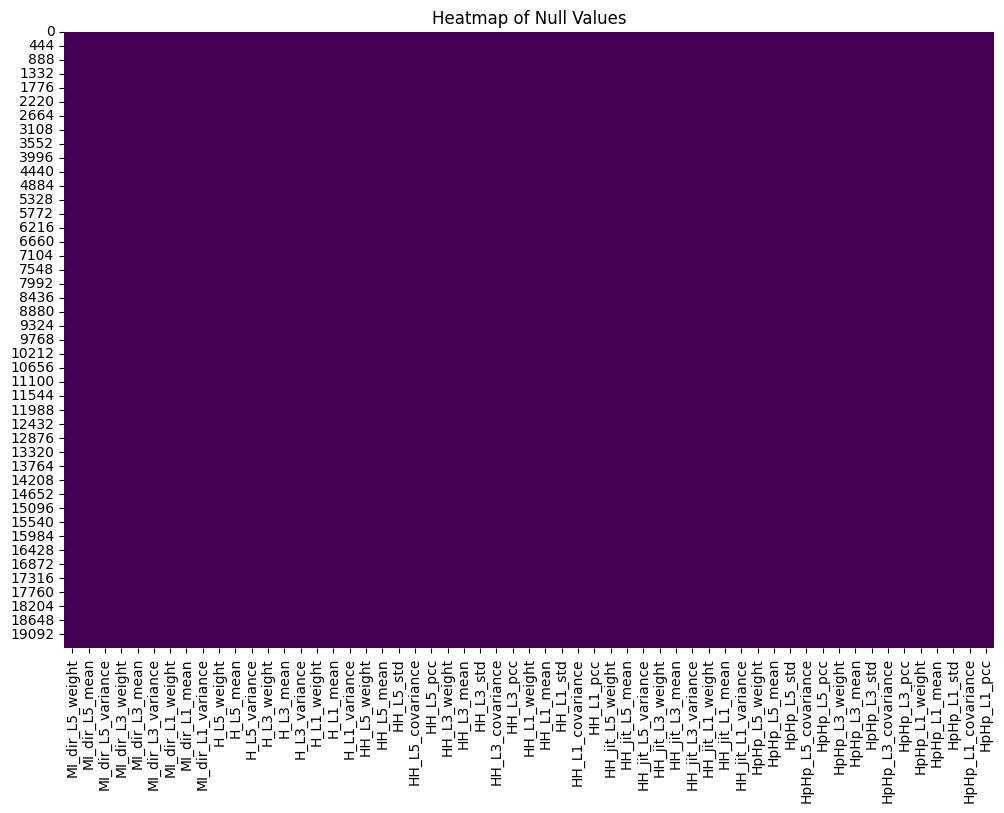

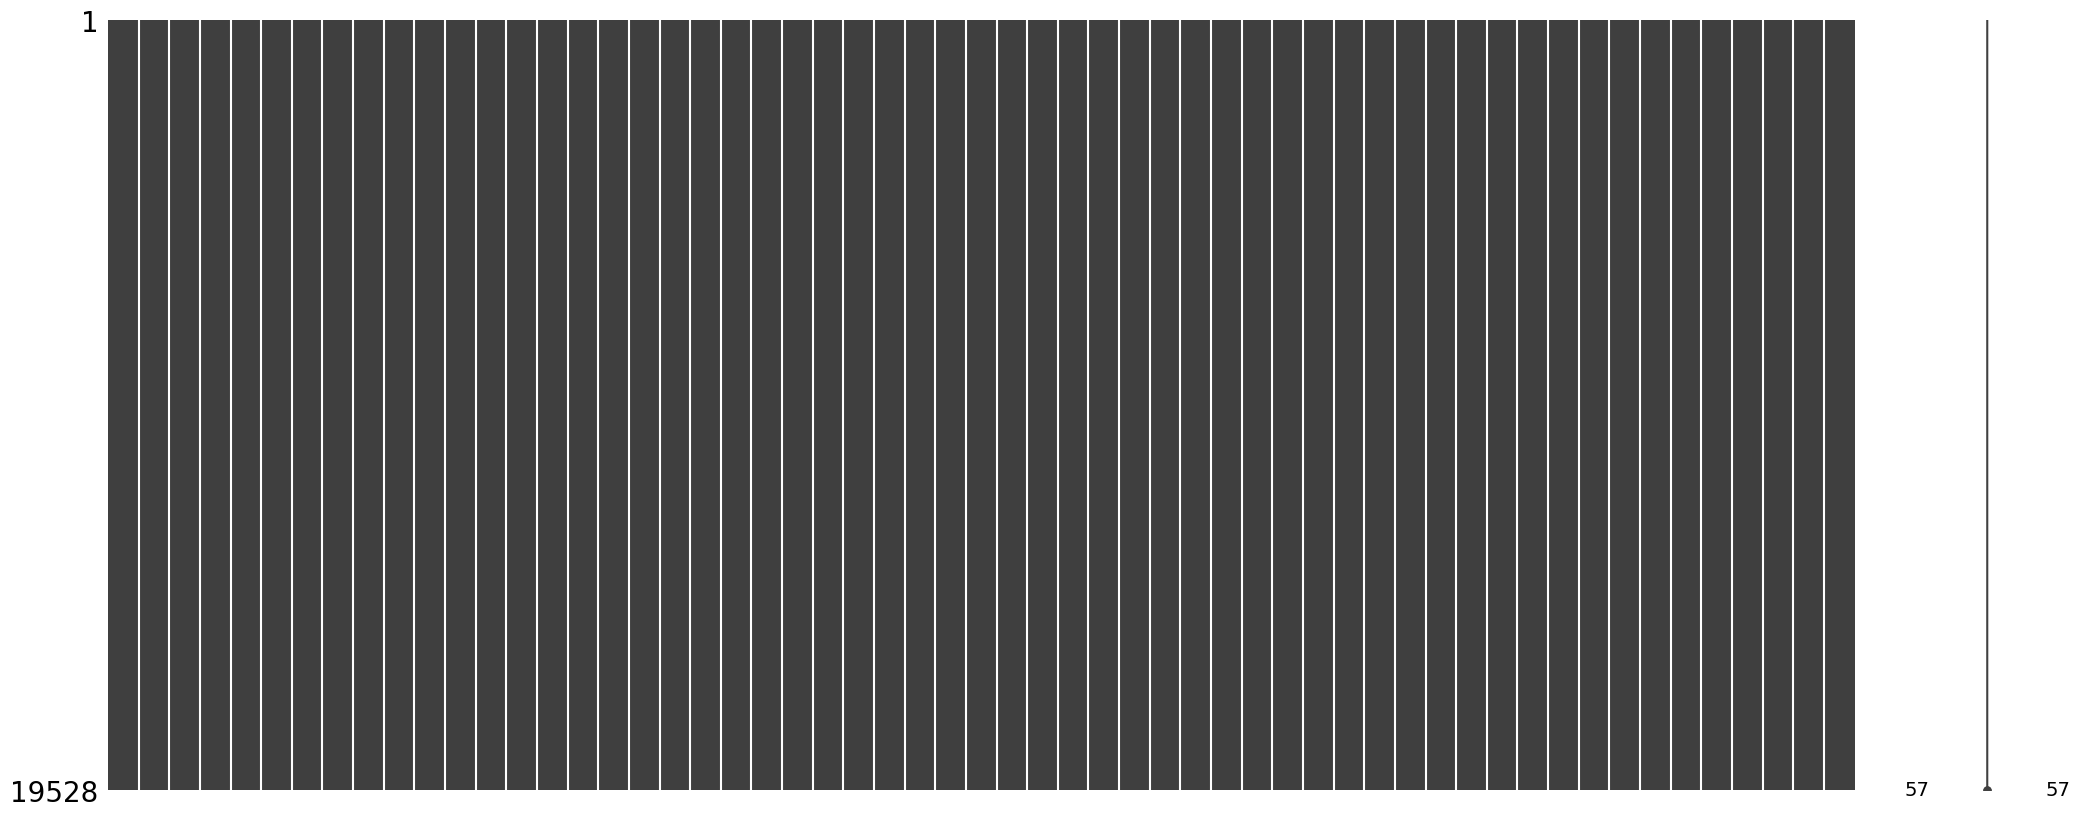

In [ ]:
# Check for null values
print("Null values in DataFrame:")
print(df.isnull())

# Count null values per column
print("\nCount of null values per column:")
print(df.isnull().sum())

# Display rows with null values
print("\nRows with null values:")
print(df[df.isnull().any(axis=1)])

# Visualize null values with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Null Values')
plt.show()

# Visualize missing values matrix
msno.matrix(df)
plt.show()

In [ ]:
data_types = df.dtypes
print("Data types of each column:")
print(data_types)

Data types of each column:
MI_dir_L5_weight      float64
MI_dir_L5_mean        float64
MI_dir_L5_variance    float64
MI_dir_L3_weight      float64
MI_dir_L3_mean        float64
MI_dir_L3_variance    float64
MI_dir_L1_weight      float64
MI_dir_L1_mean        float64
MI_dir_L1_variance    float64
H_L5_weight           float64
H_L5_mean             float64
H_L5_variance         float64
H_L3_weight           float64
H_L3_mean             float64
H_L3_variance         float64
H_L1_weight           float64
H_L1_mean             float64
H_L1_variance         float64
HH_L5_weight          float64
HH_L5_mean            float64
HH_L5_std             float64
HH_L5_covariance      float64
HH_L5_pcc             float64
HH_L3_weight          float64
HH_L3_mean            float64
HH_L3_std             float64
HH_L3_covariance      float64
HH_L3_pcc             float64
HH_L1_weight          float64
HH_L1_mean            float64
HH_L1_std             float64
HH_L1_covariance      float64
HH_L1_pcc    

In [ ]:
max_values = df.max()
min_values = df.min()

print("Maximum values for each feature:")
print(max_values)

print("\nMinimum values for each feature:")
print(min_values)

Maximum values for each feature:
MI_dir_L5_weight      2.362375e+01
MI_dir_L5_mean        6.700000e+02
MI_dir_L5_variance    8.329021e+04
MI_dir_L3_weight      2.460470e+01
MI_dir_L3_mean        6.700000e+02
MI_dir_L3_variance    8.935411e+04
MI_dir_L1_weight      2.620533e+01
MI_dir_L1_mean        6.695648e+02
MI_dir_L1_variance    9.255742e+04
H_L5_weight           2.362375e+01
H_L5_mean             6.700000e+02
H_L5_variance         8.329021e+04
H_L3_weight           2.460470e+01
H_L3_mean             6.700000e+02
H_L3_variance         8.935411e+04
H_L1_weight           2.620533e+01
H_L1_mean             6.695648e+02
H_L1_variance         9.255742e+04
HH_L5_weight          2.362375e+01
HH_L5_mean            6.700000e+02
HH_L5_std             2.212379e+02
HH_L5_covariance      3.641386e+03
HH_L5_pcc             4.343272e-01
HH_L3_weight          2.460470e+01
HH_L3_mean            6.700000e+02
HH_L3_std             2.202617e+02
HH_L3_covariance      4.960503e+03
HH_L3_pcc             

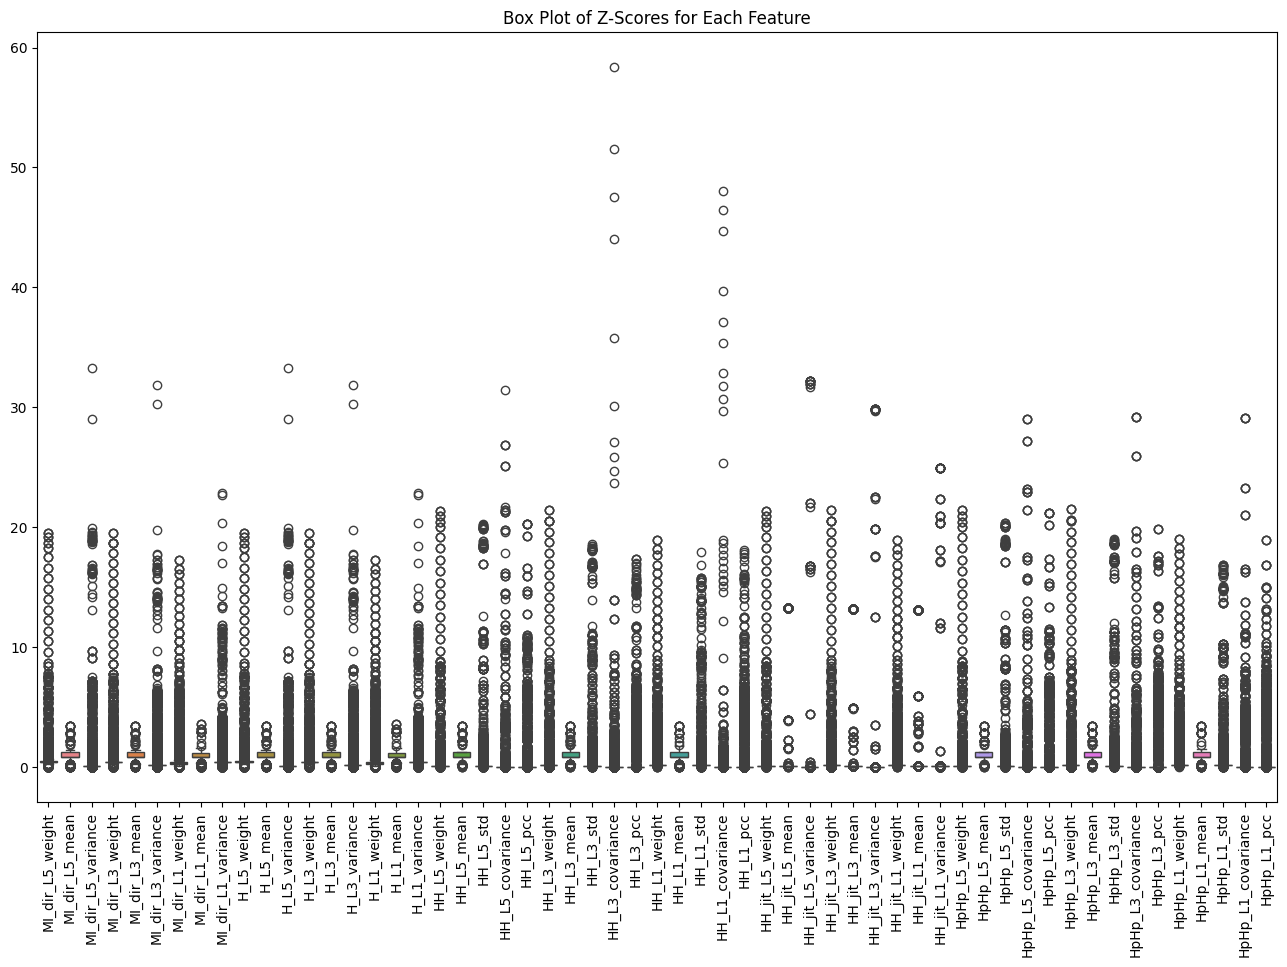

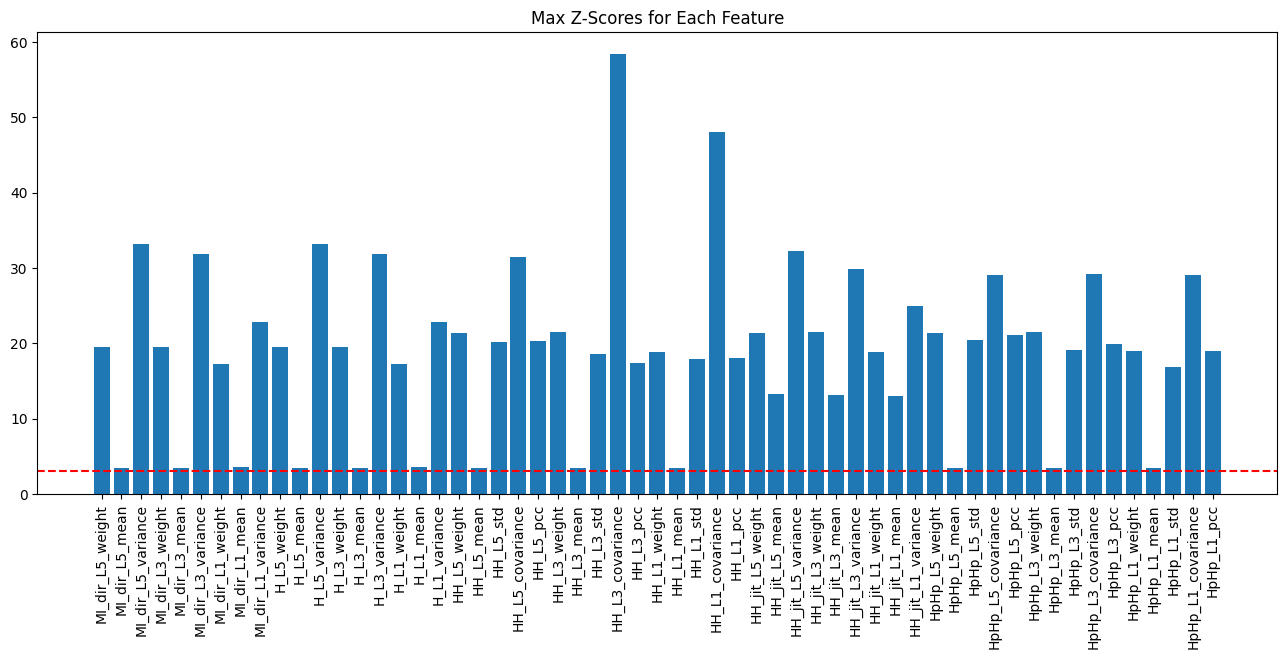

In [ ]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include=[np.number]).columns)
z_scores_df.head()
# Create a box plot for all features
plt.figure(figsize=(16, 10))  # Adjust the size depending on the number of features
sns.boxplot(data=z_scores_df)
plt.xticks(rotation=90)  # Rotate feature names if necessary
plt.title('Box Plot of Z-Scores for Each Feature')
plt.show()
# Calculate max Z-score for each feature
max_z_scores = z_scores_df.max()

# Plot the max Z-scores for each feature
plt.figure(figsize=(16, 6))
plt.bar(max_z_scores.index, max_z_scores.values)
plt.axhline(y=3, color='r', linestyle='--')  # Outlier threshold
plt.xticks(rotation=90)
plt.title('Max Z-Scores for Each Feature')
plt.show()

In [ ]:
threshold = 3

# Identify outliers for each feature
outliers = (z_scores_df > threshold)

# Display the rows and features that are outliers
outliers_summary = df[outliers.any(axis=1)]
print(f"Number of rows with outliers: {outliers_summary.shape[0]}")

# Display the first few rows with outliers
outliers_summary.head()

Number of rows with outliers: 1172


MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000            60.0        0.000000e+00          1.000000   
2          1.000000            60.0        0.000000e+00          1.000000   
5          1.000000            60.0        0.000000e+00          1.000000   
6          1.451038            60.0        0.000000e+00          1.620194   
7          1.008969            60.0        4.550000e-13          1.076595   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0            60.0        0.000000e+00          1.000000            60.0   
2            60.0        0.000000e+00          1.000000            60.0   
5            60.0        0.000000e+00          1.000000            60.0   
6            60.0        0.000000e+00          1.852791            60.0   
7            60.0        9.090000e-13          1.669943            60.0   

   MI_dir_L1_variance  H_L5_weight  ...  HpHp_L3_weight  HpHp_L3_mean  \
0        0.000000e+00     1.000000  ...        1.000000          60.0   
2        0.000000e+00     1.000000  ...        1.000000          60.0   
5        0.000000e+00     1.000000  ...        1.000000          60.0   
6        4.550000e-13     1.451038  ...        1.620194          60.0   
7        0.000000e+00     1.008969  ...        1.076595          60.0   

    HpHp_L3_std  HpHp_L3_covariance  HpHp_L3_pcc  HpHp_L1_weight  \
0  0.000000e+00                 0.0          0.0        1.000000   
2  0.000000e+00                 0.0          0.0        1.000000   
5  0.000000e+00                 0.0          0.0        1.000000   
6  0.000000e+00                 0.0          0.0        1.852791   
7  9.540000e-07                 0.0          0.0        1.669943   

   HpHp_L1_mean   HpHp_L1_std  HpHp_L1_covariance  HpHp_L1_pcc  
0          60.0  0.000000e+00                 0.0          0.0  
2          60.0  0.000000e+00                 0.0          0.0  
5          60.0  0.000000e+00                 0.0          0.0  
6          60.0  6.740000e-07                 0.0          0.0  
7          60.0  0.000000e+00                 0.0          0.0  

[5 rows x 57 columns]

In [ ]:
# Count of outliers per feature
outlier_counts_per_feature = outliers.sum()

# Print the number of outliers per feature
print("Number of outliers per feature:")
print(outlier_counts_per_feature)

Number of outliers per feature:
MI_dir_L5_weight      224
MI_dir_L5_mean          7
MI_dir_L5_variance    229
MI_dir_L3_weight      248
MI_dir_L3_mean          7
MI_dir_L3_variance    310
MI_dir_L1_weight      338
MI_dir_L1_mean          7
MI_dir_L1_variance    436
H_L5_weight           224
H_L5_mean               7
H_L5_variance         229
H_L3_weight           248
H_L3_mean               7
H_L3_variance         310
H_L1_weight           338
H_L1_mean               7
H_L1_variance         436
HH_L5_weight          213
HH_L5_mean              7
HH_L5_std             119
HH_L5_covariance      182
HH_L5_pcc             285
HH_L3_weight          238
HH_L3_mean              7
HH_L3_std             155
HH_L3_covariance       91
HH_L3_pcc             361
HH_L1_weight          345
HH_L1_mean              7
HH_L1_std             211
HH_L1_covariance       43
HH_L1_pcc             380
HH_jit_L5_weight      213
HH_jit_L5_mean        122
HH_jit_L5_variance     35
HH_jit_L3_weight      238
HH_jit

Number of outliers per feature:
MI_dir_L5_weight      224
MI_dir_L5_mean          7
MI_dir_L5_variance    229
MI_dir_L3_weight      248
MI_dir_L3_mean          7
MI_dir_L3_variance    310
MI_dir_L1_weight      338
MI_dir_L1_mean          7
MI_dir_L1_variance    436
H_L5_weight           224
H_L5_mean               7
H_L5_variance         229
H_L3_weight           248
H_L3_mean               7
H_L3_variance         310
H_L1_weight           338
H_L1_mean               7
H_L1_variance         436
HH_L5_weight          213
HH_L5_mean              7
HH_L5_std             119
HH_L5_covariance      182
HH_L5_pcc             285
HH_L3_weight          238
HH_L3_mean              7
HH_L3_std             155
HH_L3_covariance       91
HH_L3_pcc             361
HH_L1_weight          345
HH_L1_mean              7
HH_L1_std             211
HH_L1_covariance       43
HH_L1_pcc             380
HH_jit_L5_weight      213
HH_jit_L5_mean        122
HH_jit_L5_variance     35
HH_jit_L3_weight      238
HH_jit

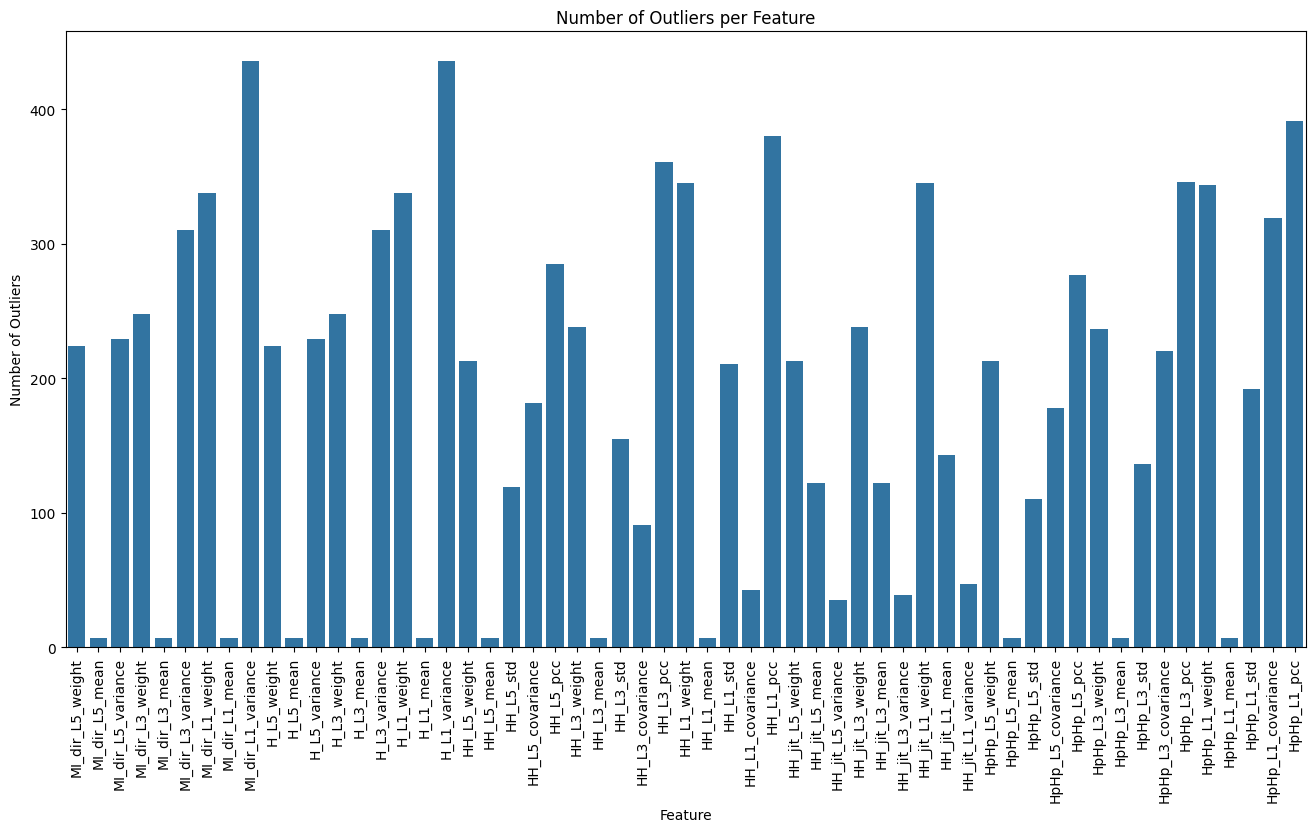

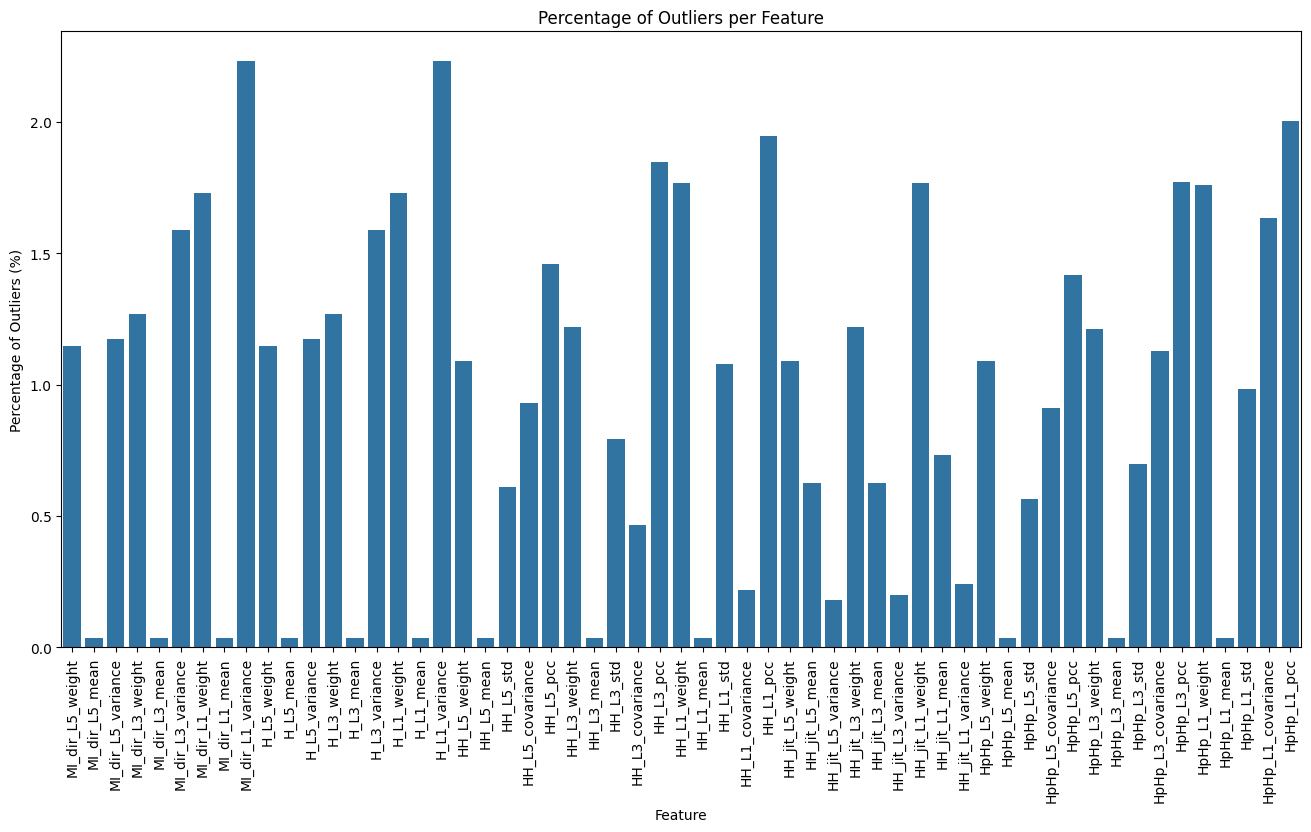

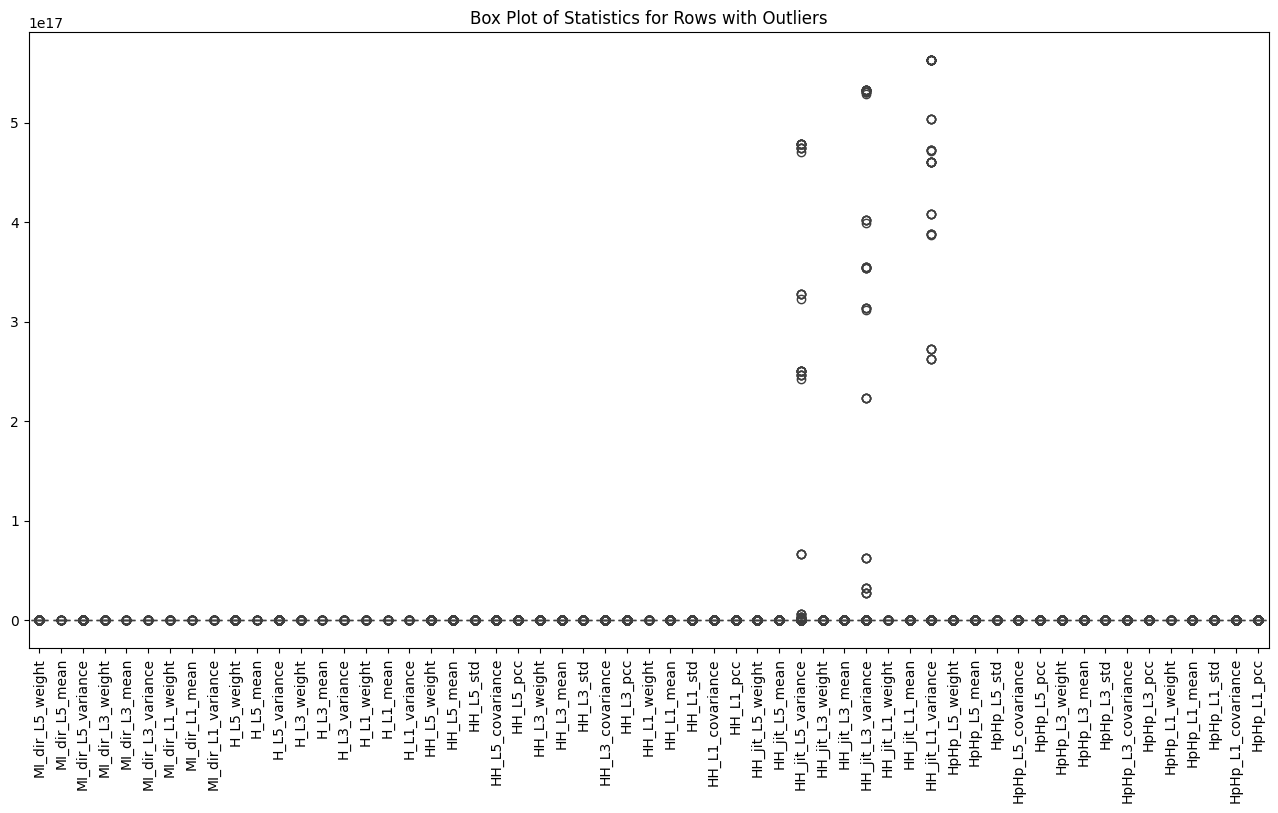

In [ ]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include=[np.number]).columns)

# Define threshold
threshold = 3

# Identify outliers
outliers = (z_scores_df > threshold)

# Summary of outliers
outliers_summary = df[outliers.any(axis=1)]

# Aggregate statistics for outliers
outlier_counts_per_feature = outliers.sum()
outlier_percentage_per_feature = (outlier_counts_per_feature / df.shape[0]) * 100
outliers_summary_stats = outliers_summary.describe()

# Print outlier counts and percentages
print("Number of outliers per feature:")
print(outlier_counts_per_feature)

print("\nPercentage of outliers per feature:")
print(outlier_percentage_per_feature)

print("\nAggregated statistics for rows with outliers:")
print(outliers_summary_stats)

# Visualize number of outliers per feature
plt.figure(figsize=(16, 8))
sns.barplot(x=outlier_counts_per_feature.index, y=outlier_counts_per_feature.values)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers per Feature')
plt.show()

# Visualize percentage of outliers per feature
plt.figure(figsize=(16, 8))
sns.barplot(x=outlier_percentage_per_feature.index, y=outlier_percentage_per_feature.values)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Percentage of Outliers (%)')
plt.title('Percentage of Outliers per Feature')
plt.show()

# Visualize summary statistics for rows with outliers
plt.figure(figsize=(16, 8))
sns.boxplot(data=outliers_summary)
plt.xticks(rotation=90)
plt.title('Box Plot of Statistics for Rows with Outliers')
plt.show()

In [ ]:
# Remove rows with any outliers
df_cleaned = df[~outliers.any(axis=1)]
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

# Check the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(df_cleaned.head())
print("\nSummary statistics of the cleaned dataset:")
print(df_cleaned.describe())

Original dataset shape: (19528, 57)
Cleaned dataset shape: (18356, 57)

First few rows of the cleaned dataset:
    MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
1           1.000000            60.0        0.000000e+00          1.000000   
3           1.000000           590.0        0.000000e+00          1.000000   
4           1.927179           590.0        0.000000e+00          1.955648   
11          1.000000            60.0        3.180000e-12          1.000000   
12          1.383313            60.0        1.360000e-12          1.562513   

    MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
1             60.0            0.000000          1.000000       60.000000   
3            590.0            0.000000          1.000000      590.000000   
4            590.0            0.000000          1.984992      590.000000   
11            60.0            0.000022          1.002160       60.238384   
12            60.0            0.000008  

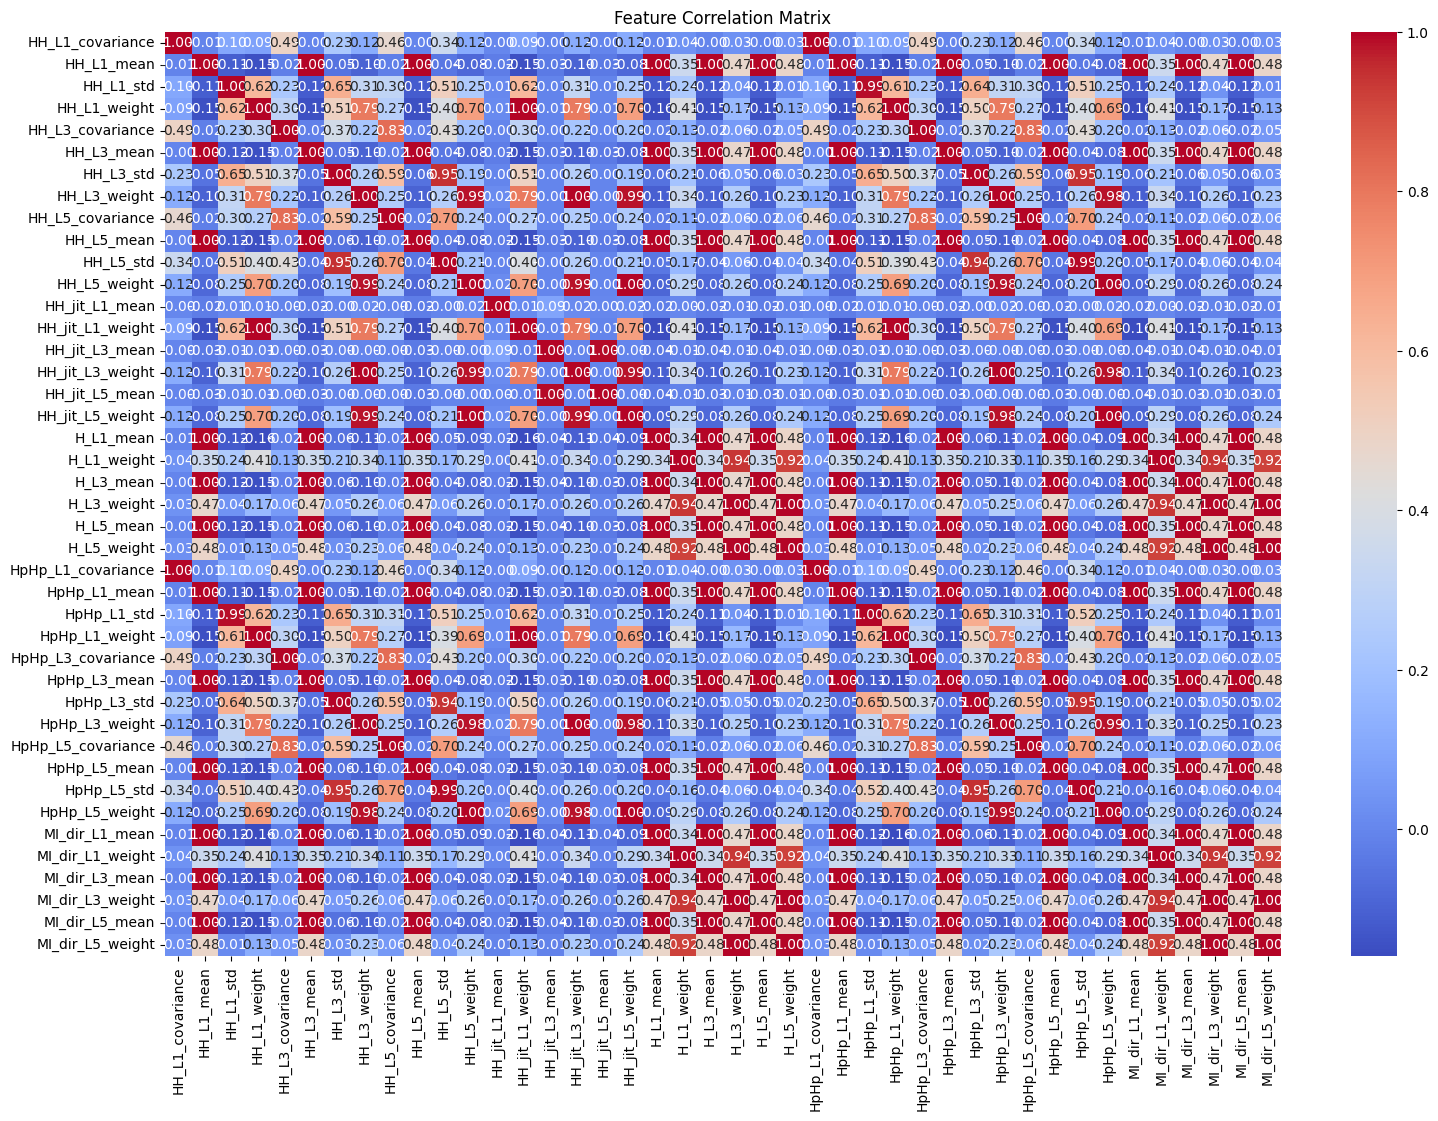

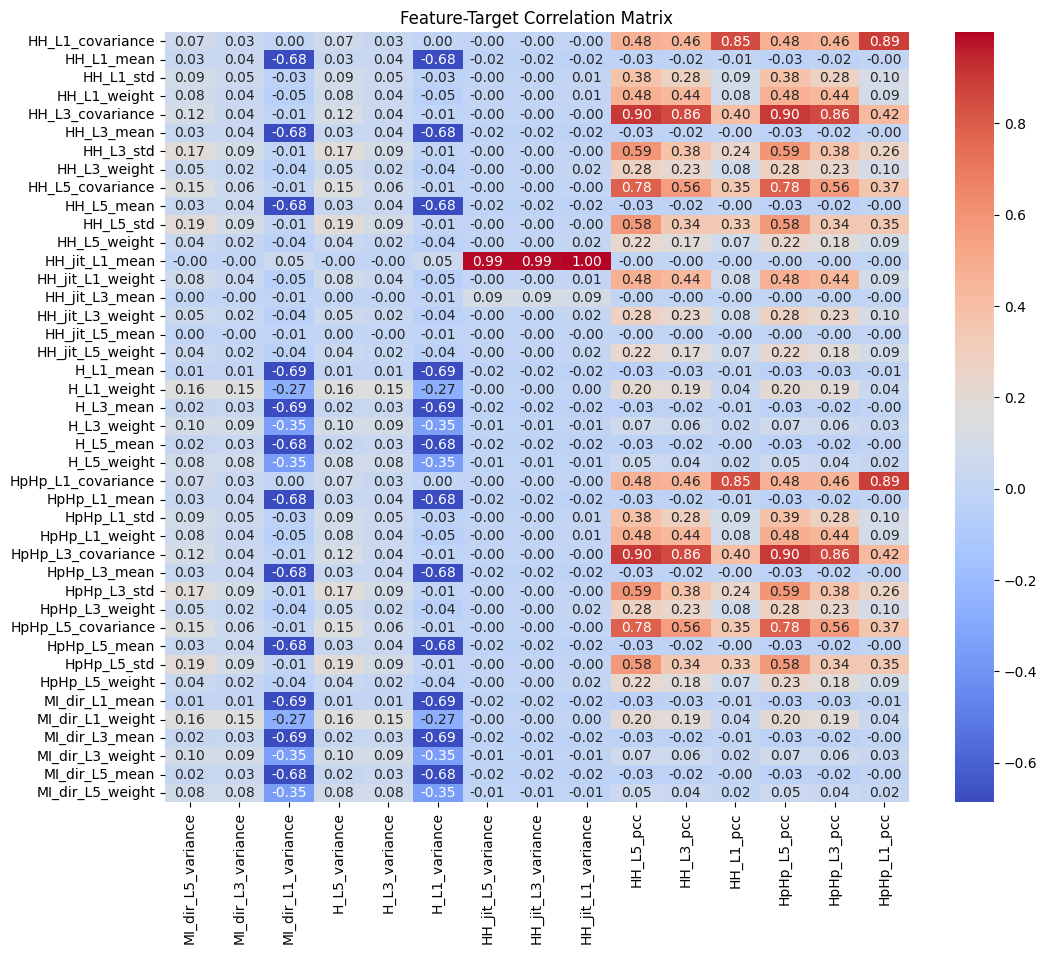

Descriptive Statistics for Features:
       HH_L1_covariance    HH_L1_mean     HH_L1_std  HH_L1_weight  \
count      1.835600e+04  18356.000000  1.835600e+04  18356.000000   
mean       1.329584e-01    225.758610  2.218315e-01      1.032616   
std        1.990315e+01    131.422092  2.155632e+00      0.223754   
min       -5.788857e+02     60.000000  0.000000e+00      1.000000   
25%      -1.412500e-101     60.000000  0.000000e+00      1.000000   
50%        0.000000e+00    330.000000  6.740000e-07      1.000000   
75%        5.520000e-87    330.000000  3.810000e-06      1.000000   
max        7.932877e+02    589.996854  3.537114e+01      4.806214   

       HH_L3_covariance    HH_L3_mean     HH_L3_std  HH_L3_weight  \
count      18356.000000  18356.000000  18356.000000  18356.000000   
mean           0.195777    225.716841      0.054404      1.014225   
std            8.618493    131.472193      0.990768      0.135846   
min         -206.957087     60.000000      0.000000      1.000000

In [ ]:
# Define target columns
target_columns = [
    'MI_dir_L5_variance', 'MI_dir_L3_variance', 'MI_dir_L1_variance', 'H_L5_variance', 'H_L3_variance', 'H_L1_variance',
    'HH_jit_L5_variance', 'HH_jit_L3_variance', 'HH_jit_L1_variance', 'HH_L5_pcc',
    'HH_L3_pcc', 'HH_L1_pcc', 'HpHp_L5_pcc', 'HpHp_L3_pcc', 'HpHp_L1_pcc'
]

# Extract feature columns (excluding target columns)
feature_columns = df_cleaned.columns.difference(target_columns)

# Extract features and targets
X = df_cleaned[feature_columns]
y = df_cleaned[target_columns]

# Compute correlation matrix for features
feature_correlation_matrix = X.corr()

# Plot the correlation matrix for features
plt.figure(figsize=(18, 12))
sns.heatmap(feature_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# Compute correlation matrix for features with each target variable
target_correlation_matrix = pd.DataFrame({target: X.corrwith(df_cleaned[target]) for target in target_columns})

# Plot the correlation matrix for features with each target variable
plt.figure(figsize=(12, 10))
sns.heatmap(target_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature-Target Correlation Matrix')
plt.show()

# Descriptive statistics for features
print("Descriptive Statistics for Features:")
print(X.describe())

# Descriptive statistics for target variables
print("\nDescriptive Statistics for Target Variables:")
print(y.describe())


In [ ]:
# Define features
target_columns = [
                     'MI_dir_L5_variance', 'MI_dir_L3_variance', 'MI_dir_L1_variance', 'H_L5_variance', 'H_L3_variance', 'H_L1_variance',
    'HH_jit_L5_variance', 'HH_jit_L3_variance', 'HH_jit_L1_variance', 'HH_L5_pcc',
    'HH_L3_pcc', 'HH_L1_pcc', 'HpHp_L5_pcc', 'HpHp_L3_pcc', 'HpHp_L1_pcc'
]
feature_columns = df.columns.difference(target_columns)

X = df_cleaned[feature_columns]

# Compute the correlation matrix for features
correlation_matrix = X.corr()
# Define the threshold for highly correlated features
high_corr_threshold = 3
# Extract pairs of highly correlated features
def get_highly_correlated_features(corr_matrix, threshold):
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    return corr_pairs

high_corr_pairs = get_highly_correlated_features(correlation_matrix, high_corr_threshold)

# Print the highly correlated pairs
print("Highly Correlated Features (Correlation > 3):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

Highly Correlated Features (Correlation > 3):


Distance Matrix:
                    HH_L1_covariance    HH_L1_mean  HH_L1_std  HH_L1_weight  \
HH_L1_covariance            0.000000  1.006172e+00   0.900008      0.914942   
HH_L1_mean                  1.006172  0.000000e+00   1.112309      1.147578   
HH_L1_std                   0.900008  1.112309e+00   0.000000      0.384891   
HH_L1_weight                0.914942  1.147578e+00   0.384891      0.000000   
HH_L3_covariance            0.505858  1.019505e+00   0.769048      0.703121   
HH_L3_mean                  1.003640  2.625570e-05   1.116233      1.148818   
HH_L3_std                   0.768853  1.053187e+00   0.354003      0.494481   
HH_L3_weight                0.879736  1.099898e+00   0.686662      0.206176   
HH_L5_covariance            0.536868  1.022324e+00   0.696488      0.729557   
HH_L5_mean                  1.003136  3.596090e-05   1.116485      1.148941   
HH_L5_std                   0.659030  1.041321e+00   0.487032      0.601324   
HH_L5_weight                0.88471

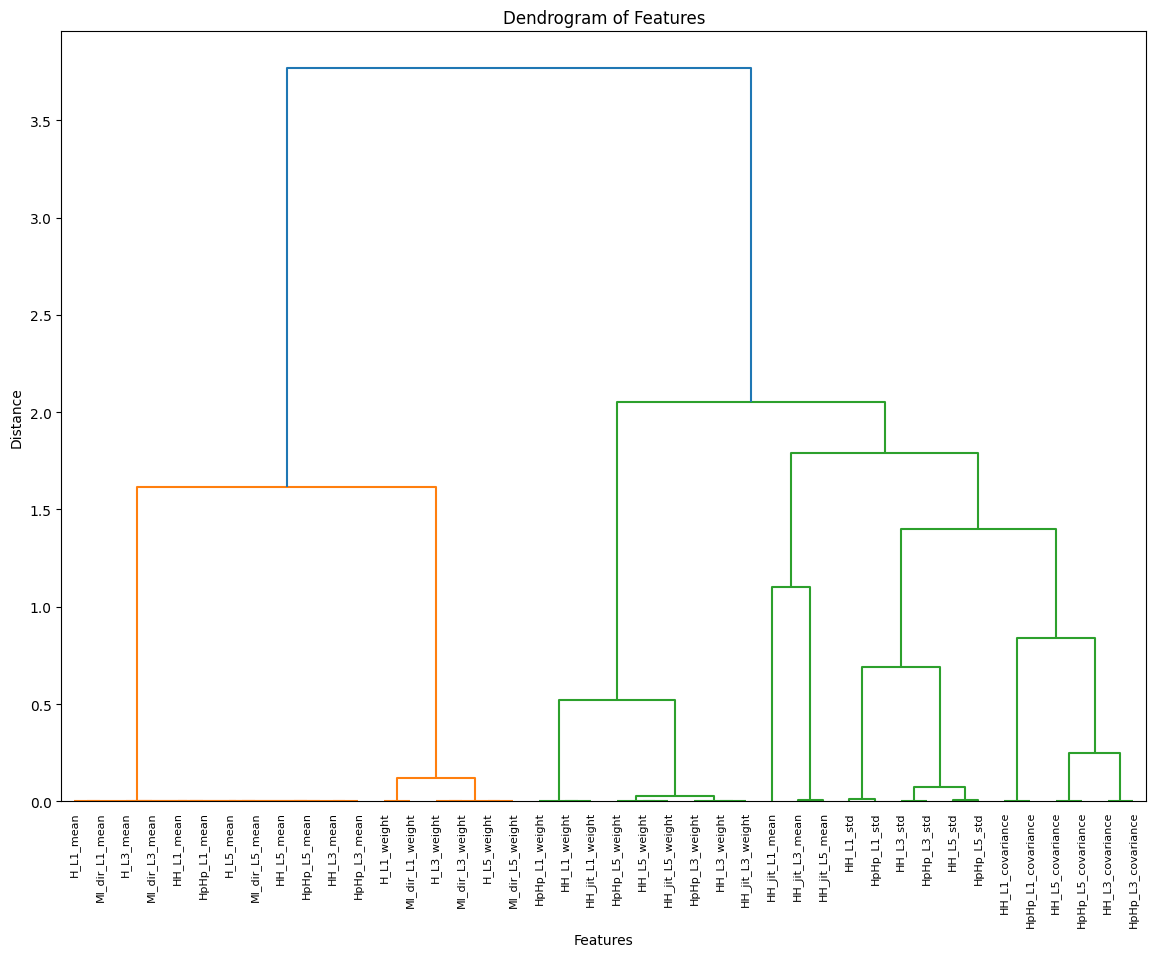

Cluster Summary:
   Cluster                                            Feature
0        1  [HH_L1_mean, HH_L3_mean, HH_L5_mean, H_L1_mean...
1        2  [H_L1_weight, H_L3_weight, H_L5_weight, MI_dir...
2        3  [HH_L1_weight, HH_L3_weight, HH_L5_weight, HH_...
3        4                   [HH_jit_L3_mean, HH_jit_L5_mean]
4        5                                   [HH_jit_L1_mean]
5        6  [HH_L1_std, HH_L3_std, HH_L5_std, HpHp_L1_std,...
6        7             [HH_L1_covariance, HpHp_L1_covariance]
7        8  [HH_L3_covariance, HH_L5_covariance, HpHp_L3_c...


In [ ]:
# Assuming X is your DataFrame of feature columns
correlation_matrix = X.corr()

# Convert correlation matrix to distance matrix
distance_matrix = 1 - correlation_matrix

# Make sure the distance matrix is in condensed form
condensed_distance_matrix = squareform(distance_matrix)

# Create linkage matrix
linkage_matrix = sch.linkage(condensed_distance_matrix, method='ward')

print("Distance Matrix:")
print(distance_matrix)

print("Condensed Distance Matrix:")
print(condensed_distance_matrix)

# Plot dendrogram
plt.figure(figsize=(14, 10))
dendrogram = sch.dendrogram(linkage_matrix, labels=X.columns, leaf_rotation=90)
plt.title('Dendrogram of Features')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

# Generate cluster labels
max_d = 0.7  # Example threshold for distance to form clusters, you can adjust this
cluster_labels = fcluster(linkage_matrix, max_d, criterion='distance')

# Create a DataFrame to hold cluster information
feature_clusters = pd.DataFrame({
    'Feature': X.columns,
    'Cluster': cluster_labels
})

# Summarize clusters
cluster_summary = feature_clusters.groupby('Cluster')['Feature'].apply(list).reset_index()
print("Cluster Summary:")
print(cluster_summary)

               Feature  Cluster
0     HH_L1_covariance        3
1           HH_L1_mean        1
2            HH_L1_std        3
3         HH_L1_weight        2
4     HH_L3_covariance        3
5           HH_L3_mean        1
6            HH_L3_std        3
7         HH_L3_weight        2
8     HH_L5_covariance        3
9           HH_L5_mean        1
10           HH_L5_std        3
11        HH_L5_weight        2
12      HH_jit_L1_mean        3
13    HH_jit_L1_weight        2
14      HH_jit_L3_mean        3
15    HH_jit_L3_weight        2
16      HH_jit_L5_mean        3
17    HH_jit_L5_weight        2
18           H_L1_mean        1
19         H_L1_weight        1
20           H_L3_mean        1
21         H_L3_weight        1
22           H_L5_mean        1
23         H_L5_weight        1
24  HpHp_L1_covariance        3
25        HpHp_L1_mean        1
26         HpHp_L1_std        3
27      HpHp_L1_weight        2
28  HpHp_L3_covariance        3
29        HpHp_L3_mean        1
30      

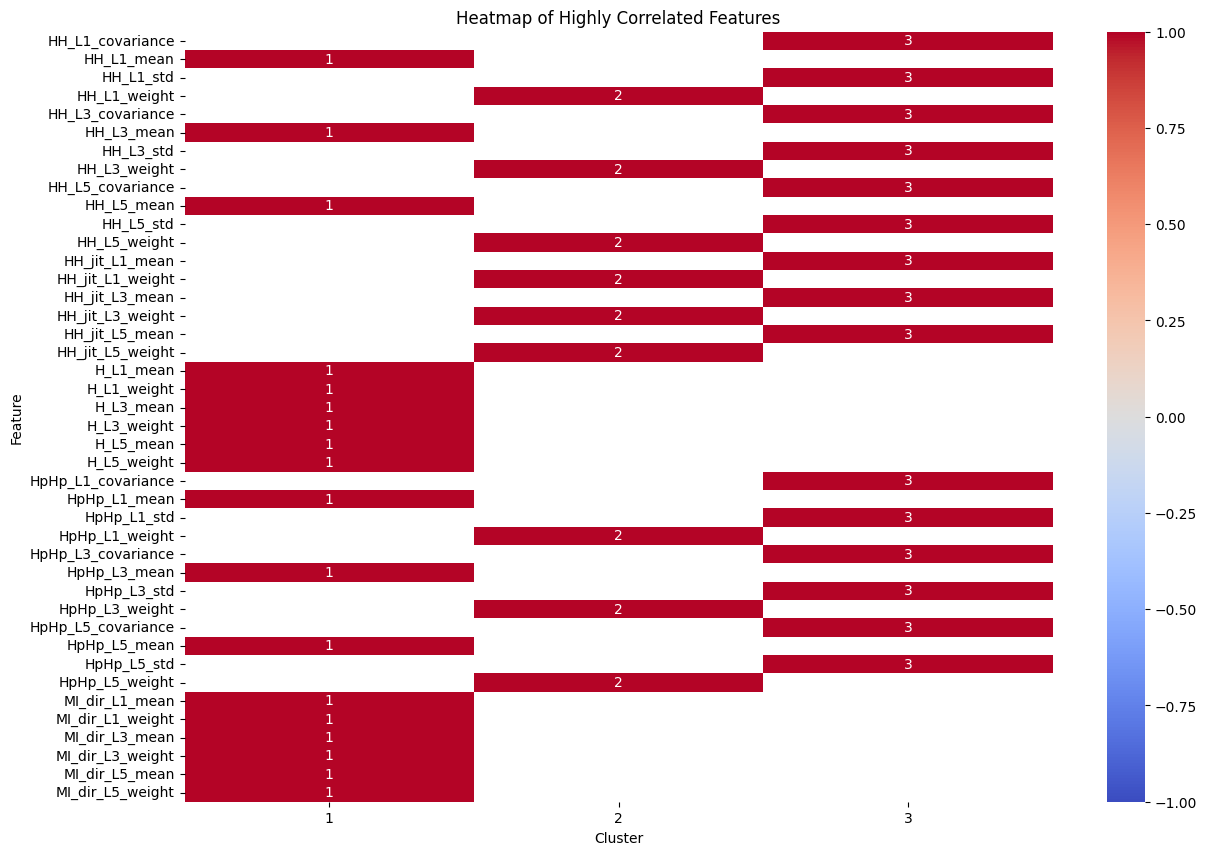

In [ ]:
# Define the maximum distance for clusters
max_distance = 2

# Get cluster labels
cluster_labels = fcluster(linkage_matrix, max_distance, criterion='distance')

# Create a DataFrame with features and their cluster labels
feature_clusters = pd.DataFrame({'Feature': correlation_matrix.columns, 'Cluster': cluster_labels})
print(feature_clusters)

# Create a pivot table for the heatmap
cluster_pivot = feature_clusters.pivot(index='Feature', columns='Cluster', values='Cluster')

plt.figure(figsize=(14, 10))
sns.heatmap(cluster_pivot, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Highly Correlated Features')
plt.show()

In [ ]:
# Create a DataFrame with features and their cluster labels
feature_clusters = pd.DataFrame({'Feature': correlation_matrix.columns, 'Cluster': cluster_labels})

# Select one feature per cluster
selected_features = feature_clusters.groupby('Cluster')['Feature'].first().values

# Create a new DataFrame with selected features
X_selected = X[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.38492964 0.39900136 0.39219246 0.38283379 0.38419619]
Mean Cross-Validation Accuracy: 0.38863068815004553
Validation Set Performance:
Accuracy: 0.39796659404502543
Precision: 0.3341355796229442
Recall: 0.4659380692167578
F1-Score: 0.19133220137155718
Test Set Performance:
Accuracy: 0.38352582261930707
Precision: 0.3339214302517055
Recall: 0.4610347085789129
F1-Score: 0.1858332132526391

--------------------------------------------------

Training model for target: MI_dir_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.38492964 0.39990921 0.39219246 0.38328792 0.38419619]
Mean Cross-Validation Accuracy: 0.38890308525695494
Validation Set Performance:
Accuracy: 0.39941902687000724
Precision: 0.3349378259125551
Recall: 0.4660831509846827
F1-Score: 0.19307363364038746
Test Set Performance:
Accuracy: 0.38374373501852255
Precision: 0.33403904963537995
Recall: 0.4612021857923498
F1-Score: 0.18624257392697416

--------------------------------------------------

Training model for target: MI_dir_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.01044031 0.01997276 0.01770313 0.01634877 0.01180745]
Mean Cross-Validation Accuracy: 0.015254485358294753
Validation Set Performance:
Accuracy: 0.017792302106027596
Precision: 0.3428076391674466
Recall: 0.3533725888609685
F1-Score: 0.02136599337152033
Test Set Performance:
Accuracy: 0.02070167792547396
Precision: 0.3453613203815229
Recall: 0.4521066257346642
F1-Score: 0.025971576615466768

--------------------------------------------------

Training model for target: H_L5_variance
Cross-Validation Accuracy Scores: [0.38492964 0.39900136 0.39219246 0.38283379 0.38419619]
Mean Cross-Validation Accuracy: 0.38863068815004553
Validation Set Performance:
Accuracy: 0.39796659404502543
Precision: 0.3341355796229442
Recall: 0.4659380692167578
F1-Score: 0.19133220137155718
Test Set Performance:
Accuracy: 0.38352582261930707
Precision: 0.3339214302517055
Recall: 0.4610347085789129
F1-Score: 0.1858332132526391

-------------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.38492964 0.39990921 0.39219246 0.38328792 0.38419619]
Mean Cross-Validation Accuracy: 0.38890308525695494
Validation Set Performance:
Accuracy: 0.39941902687000724
Precision: 0.3349378259125551
Recall: 0.4660831509846827
F1-Score: 0.19307363364038746
Test Set Performance:
Accuracy: 0.38374373501852255
Precision: 0.33403904963537995
Recall: 0.4612021857923498
F1-Score: 0.18624257392697416

--------------------------------------------------

Training model for target: H_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.01044031 0.01997276 0.01770313 0.01634877 0.01180745]
Mean Cross-Validation Accuracy: 0.015254485358294753
Validation Set Performance:
Accuracy: 0.017792302106027596
Precision: 0.3428076391674466
Recall: 0.3533725888609685
F1-Score: 0.02136599337152033
Test Set Performance:
Accuracy: 0.02070167792547396
Precision: 0.3453613203815229
Recall: 0.4521066257346642
F1-Score: 0.025971576615466768

--------------------------------------------------

Training model for target: HH_jit_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.61733999 0.61053109 0.61143895 0.6226158  0.61852861]
Mean Cross-Validation Accuracy: 0.6160908891887581
Validation Set Performance:
Accuracy: 0.6103848946986202
Precision: 0.500465549348231
Recall: 0.8051216854340719
F1-Score: 0.3799060954049701
Test Set Performance:
Accuracy: 0.623229461756374
Precision: 0.5002890173410405
Recall: 0.8115736704446381
F1-Score: 0.38449068584568

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.61733999 0.61053109 0.61143895 0.6226158  0.61852861]
Mean Cross-Validation Accuracy: 0.6160908891887581
Validation Set Performance:
Accuracy: 0.6103848946986202
Precision: 0.500465549348231
Recall: 0.8051216854340719
F1-Score: 0.3799060954049701
Test Set Performance:
Accuracy: 0.623229461756374
Precision: 0.5002890173410405
Recall: 0.8115736704446381
F1-Score: 0.38449068584568

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.61733999 0.61053109 0.61143895 0.6226158  0.61852861]
Mean Cross-Validation Accuracy: 0.6160908891887581
Validation Set Performance:
Accuracy: 0.6103848946986202
Precision: 0.500465549348231
Recall: 0.8051216854340719
F1-Score: 0.3799060954049701
Test Set Performance:
Accuracy: 0.623229461756374
Precision: 0.5002890173410405
Recall: 0.8115736704446381
F1-Score: 0.38449068584568

--------------------------------------------------

Training model for target: HH_L5_pcc
Cross-Validation Accuracy Scores: [0.99818429 0.99773037 0.99773037 0.99954587 0.9986376 ]
Mean Cross-Validation Accuracy: 0.998365699815667
Validation Set Performance:
Accuracy: 0.9974582425562818
Precision: 0.5925925925925926
Recall: 0.7771710552926425
F1-Score: 0.6492690119944629
Test Set Performance:
Accuracy: 0.9980387884070604
Precision: 0.4666666666666666
Recall: 0.5551192553810355
F1-Score: 0.4997817070508623

--------------------------------------------------

Training model for

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99909215 0.99409896 0.99818429 0.99636694 0.99772934]
Mean Cross-Validation Accuracy: 0.9970943346596561
Validation Set Performance:
Accuracy: 0.005809731299927378
Precision: 0.5417884990253411
Recall: 0.4178809957498482
F1-Score: 0.25907340812291335
Test Set Performance:
Accuracy: 0.9980387884070604
Precision: 0.783402796102599
Recall: 0.962379957570163
F1-Score: 0.8398277537551716

--------------------------------------------------

Training model for target: HpHp_L5_pcc
Cross-Validation Accuracy Scores: [0.99818429 0.99773037 0.99773037 0.99954587 0.9986376 ]
Mean Cross-Validation Accuracy: 0.998365699815667
Validation Set Performance:
Accuracy: 0.9974582425562818
Precision: 0.5925925925925926
Recall: 0.7771710552926425
F1-Score: 0.6492690119944629
Test Set Performance:
Accuracy: 0.9980387884070604
Precision: 0.4666666666666666
Recall: 0.5551192553810355
F1-Score: 0.4997817070508623

--------------------------------------------------

Training mo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99954607 0.99863822 0.99954607 0.99772934 0.99954587]
Mean Cross-Validation Accuracy: 0.9990011144080218
Validation Set Performance:
Accuracy: 0.002904865649963689
Precision: 0.5416666666666666
Recall: 0.3336974993930566
F1-Score: 0.2571377936965424
Test Set Performance:
Accuracy: 0.9995641752015689
Precision: 0.9074074074074074
Recall: 0.9998543123543123
F1-Score: 0.9500162668147238

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.6290259315755067
Average Precision: 0.4656658348491341
Average Recall: 0.6392130754550068
Average F1-Score: 0.37811987648784334


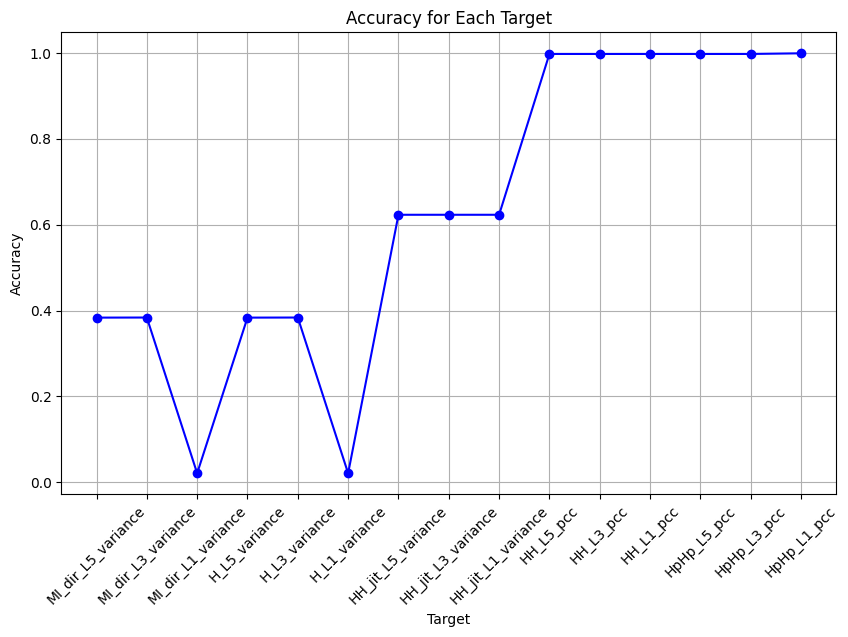

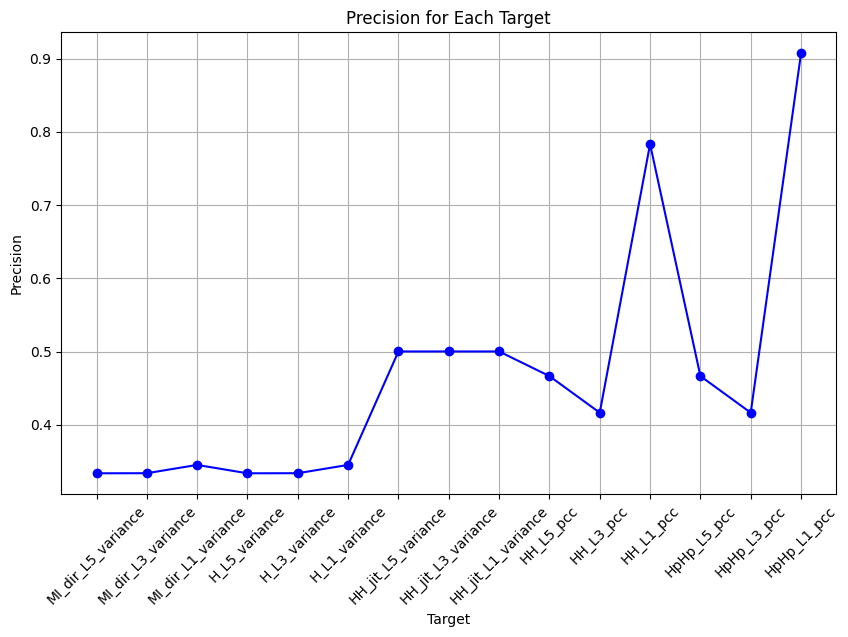

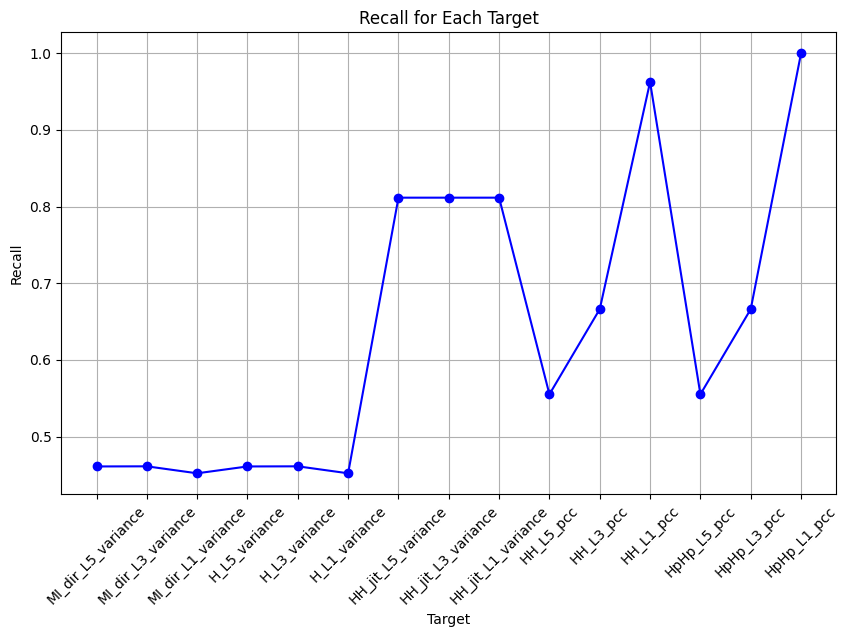

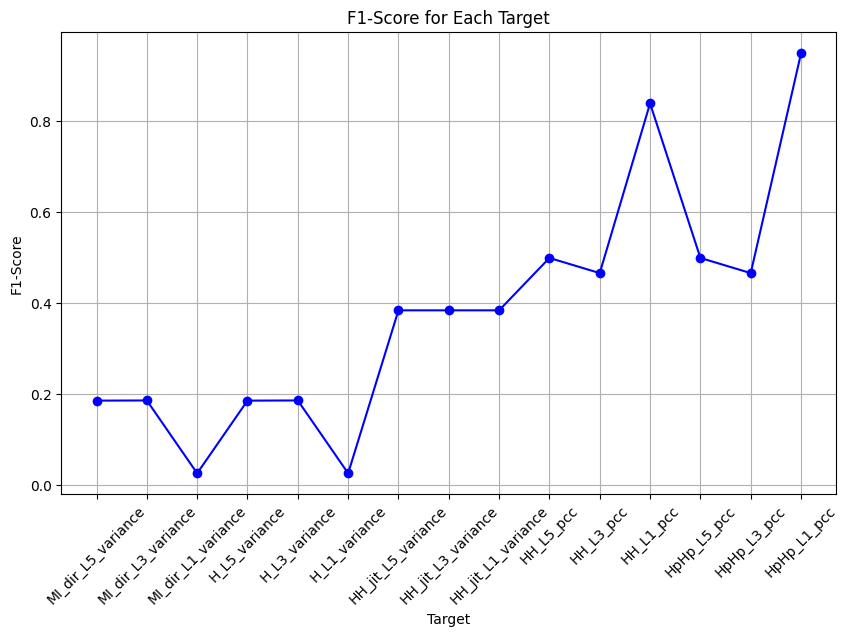

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Initialize the SVM model for classification
    model = SVC(kernel='rbf', class_weight='balanced')

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model on the full training set
    model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = model.predict(X_valid)

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Validation Set Performance:
Accuracy: 0.9734931009440814
Precision: 0.2491635687732342
Recall: 0.24417122040072858
F1-Score: 0.2466421343146274
Test Set Performance:
Accuracy: 0.9764654608847243
Precision: 0.24955446647360213
Recall: 0.24454267627155643
F1-Score: 0.2470231532524807

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Validation Set Performance:
Accuracy: 0.9724037763253449
Precision: 0.24888475836431226
Recall: 0.24416484318016046
F1-Score: 0.2465022091310751
Test Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Accuracy: 0.9751579864894312
Precision: 0.24922031632880373
Recall: 0.24453551912568305
F1-Score: 0.2468556928508385

--------------------------------------------------

Training model for target: MI_dir_L1_variance
Validation Set Performance:
Accuracy: 0.9727668845315904
Precision: 0.24354545454545454
Recall: 0.24962728289228475
F1-Score: 0.24654886802871342
Test Set Performance:
Accuracy: 0.9740684244933536
Precision: 0.3246894748311179
Recall: 0.3333333333333333
F1-Score: 0.3289546307539463

--------------------------------------------------

Training model for target: H_L5_variance
Validation Set Performance:
Accuracy: 0.9734931009440814
Precision: 0.2491635687732342
Recall: 0.24417122040072858
F1-Score: 0.2466421343146274
Test Set Performance:
Accuracy: 0.9764654608847243
Precision: 0.24955446647360213
Recall: 0.24454267627155643
F1-Score: 0.2470231532524807

--------------------------------------------------

Training model for target: H_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Validation Set Performance:
Accuracy: 0.9724037763253449
Precision: 0.24888475836431226
Recall: 0.24416484318016046
F1-Score: 0.2465022091310751
Test Set Performance:
Accuracy: 0.9751579864894312
Precision: 0.24922031632880373
Recall: 0.24453551912568305
F1-Score: 0.2468556928508385

--------------------------------------------------

Training model for target: H_L1_variance
Validation Set Performance:
Accuracy: 0.9727668845315904
Precision: 0.24354545454545454
Recall: 0.24962728289228475
F1-Score: 0.24654886802871342
Test Set Performance:
Accuracy: 0.9740684244933536
Precision: 0.3246894748311179
Recall: 0.3333333333333333
F1-Score: 0.3289546307539463

--------------------------------------------------

Training model for target: HH_jit_L5_variance
Validation Set Performance:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is i


Accuracy: 0.9927378358750908
Precision: 0.3332114564290067
Recall: 0.33103281268918755
F1-Score: 0.3321185617103984
Test Set Performance:
Accuracy: 0.9954238396164742
Precision: 0.3332603779090975
Recall: 0.33188026736413834
F1-Score: 0.33256889083033014

--------------------------------------------------

Training model for target: HH_jit_L3_variance
Validation Set Performance:
Accuracy: 0.9927378358750908
Precision: 0.3332114564290067
Recall: 0.33103281268918755
F1-Score: 0.3321185617103984
Test Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is i

Accuracy: 0.9954238396164742
Precision: 0.3332603779090975
Recall: 0.33188026736413834
F1-Score: 0.33256889083033014

--------------------------------------------------

Training model for target: HH_jit_L1_variance
Validation Set Performance:
Accuracy: 0.9927378358750908
Precision: 0.3332114564290067
Recall: 0.33103281268918755
F1-Score: 0.3321185617103984
Test Set Performance:
Accuracy: 0.9954238396164742
Precision: 0.3332603779090975
Recall: 0.33188026736413834
F1-Score: 0.33256889083033014

--------------------------------------------------

Training model for target: HH_L5_pcc
Validation Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is i

Accuracy: 0.026506899055918662
Precision: 0.3025
Recall: 0.06905260283946123
F1-Score: 0.07525690999291283
Test Set Performance:
Accuracy: 0.023752451514491176
Precision: 0.2411504424778761
Recall: 0.005944589877835951
F1-Score: 0.011603150947413241

--------------------------------------------------

Training model for target: HH_L3_pcc
Validation Set Performance:
Accuracy: 0.027233115468409588
Precision: 0.29667721518987344
Recall: 0.13173952641165756
F1-Score: 0.09643531633616619
Test Set Performance:
Accuracy: 0.02397036391370669
Precision: 0.3244837758112094
Recall: 0.08927792321116929
F1-Score: 0.09493648428074657

--------------------------------------------------

Training model for target: HH_L1_pcc
Validation Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is i

Accuracy: 0.0032679738562091504
Precision: 0.5003639010189229
Recall: 0.4500910746812386
F1-Score: 0.22313104943813036
Test Set Performance:
Accuracy: 0.9980387884070604
Precision: 0.5997379912663756
Recall: 0.36666666666666664
F1-Score: 0.4332022430995558

--------------------------------------------------

Training model for target: HpHp_L5_pcc
Validation Set Performance:
Accuracy: 0.026506899055918662
Precision: 0.3025
Recall: 0.06905260283946123
F1-Score: 0.07525690999291283
Test Set Performance:
Accuracy: 0.023752451514491176
Precision: 0.2411504424778761
Recall: 0.005944589877835951
F1-Score: 0.011603150947413241

--------------------------------------------------

Training model for target: HpHp_L3_pcc
Validation Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is i

Accuracy: 0.027233115468409588
Precision: 0.29667721518987344
Recall: 0.13173952641165756
F1-Score: 0.09643531633616619
Test Set Performance:
Accuracy: 0.02397036391370669
Precision: 0.3244837758112094
Recall: 0.08927792321116929
F1-Score: 0.09493648428074657

--------------------------------------------------

Training model for target: HpHp_L1_pcc
Validation Set Performance:
Accuracy: 0.0036310820624546117
Precision: 0.5002731245447924
Recall: 0.45027312454479246
F1-Score: 0.22331352815165112
Test Set Performance:
Accuracy: 0.9986925256047069
Precision: 0.5998689670233676
Recall: 0.43499999999999994
F1-Score: 0.4868031489112865

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.7286554804968403
Average Precision: 0.3318390029241503
Average Recall: 0.24217170349321587
Average F1-Score: 0.2517638859115123


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-

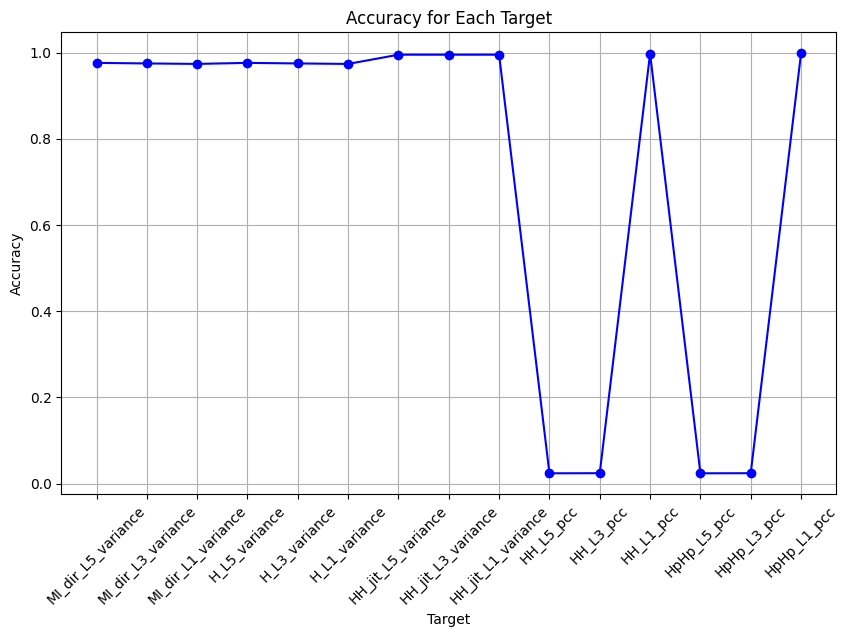

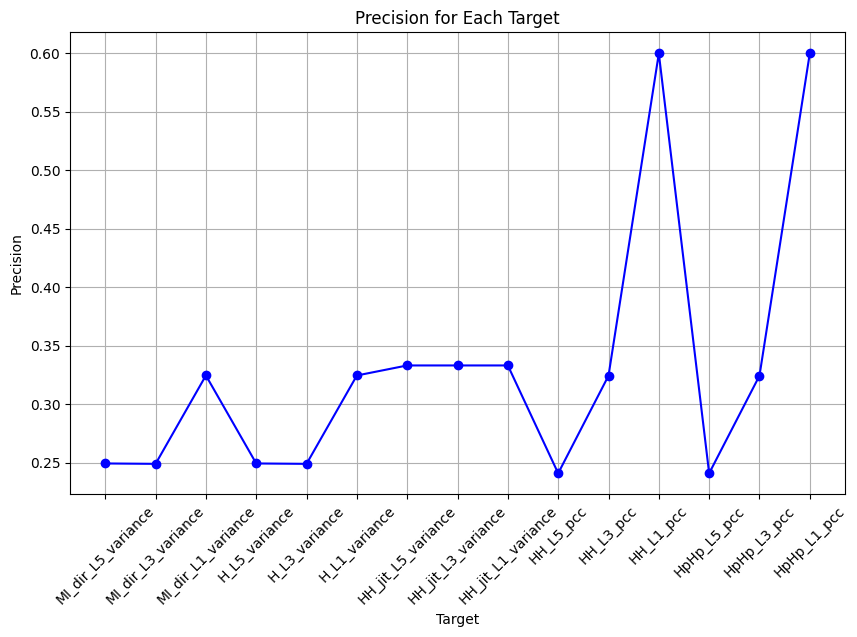

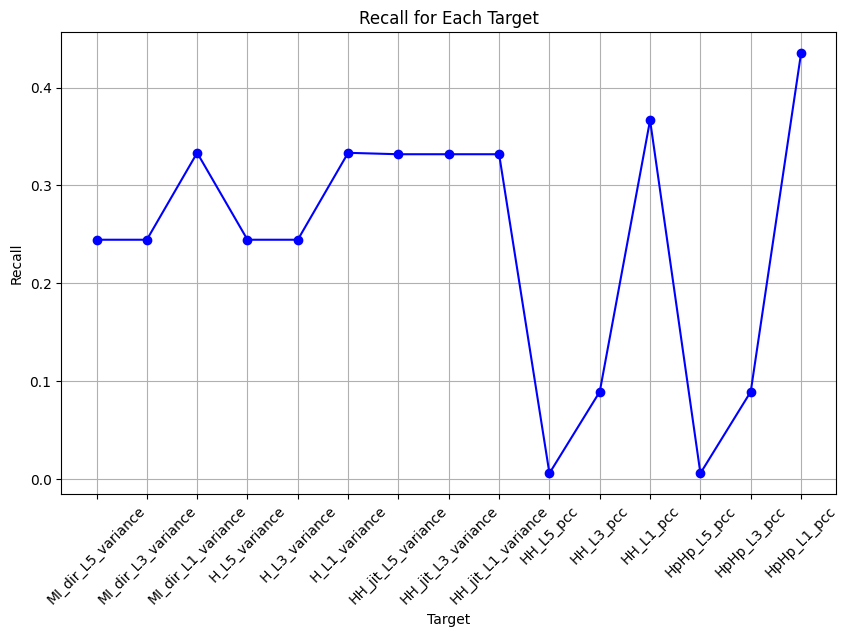

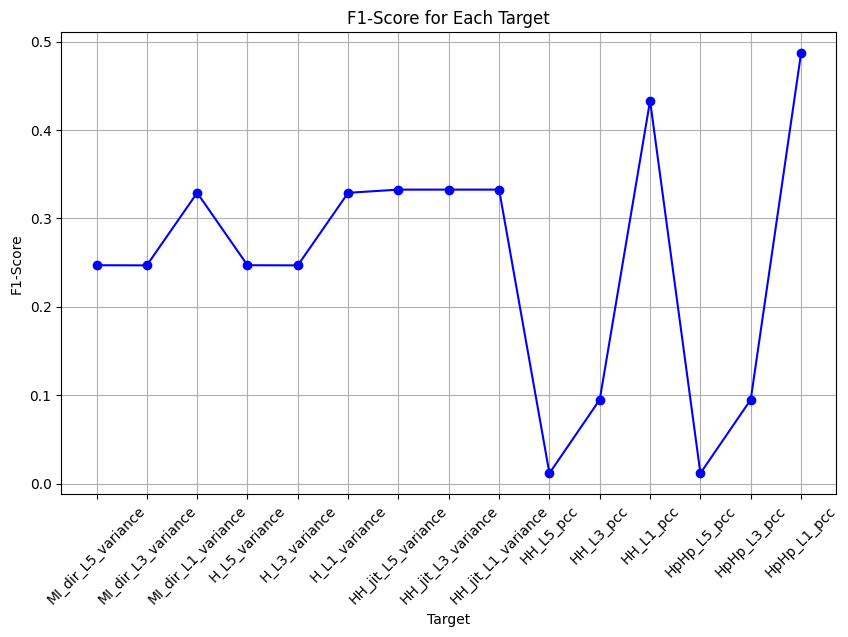

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Train the model
    model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = model.predict(X_valid)

    # Discretize the continuous predictions into bins
    y_valid_pred_binned = np.digitize(y_valid_pred, bins=np.linspace(y_valid_binned[target].min(), y_valid_binned[target].max(), 4)) - 1

    # Predict on the test set
    y_test_pred = model.predict(X_test)
    y_test_pred_binned = np.digitize(y_test_pred, bins=np.linspace(y_test_binned[target].min(), y_test_binned[target].max(), 4)) - 1

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.99909215 0.99863822 0.99863822 0.99909173 0.99909173]
Mean Cross-Validation Accuracy: 0.9989104115723626
Validation Set Performance:
Accuracy: 0.9967320261437909
Precision: 0.332244008714597
Recall: 0.3333333333333333
F1-Score: 0.33278777959629025
Test Set Performance:
Accuracy: 0.9982567008062759
Precision: 0.332752233602092
Recall: 0.3333333333333333
F1-Score: 0.3330425299890949

--------------------------------------------------

Training model for target: MI_dir_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99863822 0.99818429 0.99818429 0.9986376  0.9986376 ]
Mean Cross-Validation Accuracy: 0.9984564026513263
Validation Set Performance:
Accuracy: 0.9956427015250545
Precision: 0.3318809005083515
Recall: 0.3333333333333333
F1-Score: 0.3326055312954876
Test Set Performance:
Accuracy: 0.9969492264109828
Precision: 0.3323164088036609
Recall: 0.3333333333333333
F1-Score: 0.33282409428197296

--------------------------------------------------

Training model for target: MI_dir_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.97821153 0.97821153 0.97821153 0.9763851  0.9777475 ]
Mean Cross-Validation Accuracy: 0.9777534391835425
Validation Set Performance:
Accuracy: 0.9742193173565723
Precision: 0.32473977245219077
Recall: 0.3333333333333333
F1-Score: 0.3289804426460671
Test Set Performance:
Accuracy: 0.9740684244933536
Precision: 0.3246894748311179
Recall: 0.3333333333333333
F1-Score: 0.3289546307539463

--------------------------------------------------

Training model for target: H_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99909215 0.99863822 0.99863822 0.99909173 0.99909173]
Mean Cross-Validation Accuracy: 0.9989104115723626
Validation Set Performance:
Accuracy: 0.9967320261437909
Precision: 0.332244008714597
Recall: 0.3333333333333333
F1-Score: 0.33278777959629025
Test Set Performance:
Accuracy: 0.9982567008062759
Precision: 0.332752233602092
Recall: 0.3333333333333333
F1-Score: 0.3330425299890949

--------------------------------------------------

Training model for target: H_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99863822 0.99818429 0.99818429 0.9986376  0.9986376 ]
Mean Cross-Validation Accuracy: 0.9984564026513263
Validation Set Performance:
Accuracy: 0.9956427015250545
Precision: 0.3318809005083515
Recall: 0.3333333333333333
F1-Score: 0.3326055312954876
Test Set Performance:
Accuracy: 0.9969492264109828
Precision: 0.3323164088036609
Recall: 0.3333333333333333
F1-Score: 0.33282409428197296

--------------------------------------------------

Training model for target: H_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.97821153 0.97821153 0.97821153 0.9763851  0.9777475 ]
Mean Cross-Validation Accuracy: 0.9777534391835425
Validation Set Performance:
Accuracy: 0.9742193173565723
Precision: 0.32473977245219077
Recall: 0.3333333333333333
F1-Score: 0.3289804426460671
Test Set Performance:
Accuracy: 0.9740684244933536
Precision: 0.3246894748311179
Recall: 0.3333333333333333
F1-Score: 0.3289546307539463

--------------------------------------------------

Training model for target: HH_jit_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         0.99954607 0.99954607 1.         1.        ]
Mean Cross-Validation Accuracy: 0.9998184294144348
Validation Set Performance:
Accuracy: 0.9996368917937546
Precision: 0.4998184458968773
Recall: 0.5
F1-Score: 0.49990920646449977
Test Set Performance:
Accuracy: 0.9997820876007845
Precision: 0.49989104380039223
Recall: 0.5
F1-Score: 0.4999455159638226

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         0.99954607 0.99954607 1.         1.        ]
Mean Cross-Validation Accuracy: 0.9998184294144348
Validation Set Performance:
Accuracy: 0.9996368917937546
Precision: 0.4998184458968773
Recall: 0.5
F1-Score: 0.49990920646449977
Test Set Performance:
Accuracy: 0.9997820876007845
Precision: 0.49989104380039223
Recall: 0.5
F1-Score: 0.4999455159638226

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         0.99954607 0.99954607 1.         1.        ]
Mean Cross-Validation Accuracy: 0.9998184294144348
Validation Set Performance:
Accuracy: 0.9996368917937546
Precision: 0.4998184458968773
Recall: 0.5
F1-Score: 0.49990920646449977
Test Set Performance:
Accuracy: 0.9997820876007845
Precision: 0.49989104380039223
Recall: 0.5
F1-Score: 0.4999455159638226

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99909215 0.99818429 0.99909215 0.99818347 0.9986376 ]
Mean Cross-Validation Accuracy: 0.9986379320083298
Validation Set Performance:
Accuracy: 0.9978213507625272
Precision: 0.41630303030303023
Recall: 0.4166666666666667
F1-Score: 0.4164847492571706
Test Set Performance:
Accuracy: 0.9984746132054914
Precision: 0.33304259340020353
Recall: 0.3331878999418266
F1-Score: 0.3331152308251545

--------------------------------------------------

Training model for target: HH_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99954607 0.99818429 0.99954607 0.99818347 0.99818347]
Mean Cross-Validation Accuracy: 0.9987286760725507
Validation Set Performance:
Accuracy: 0.9967320261437909
Precision: 0.24954545454545454
Recall: 0.25
F1-Score: 0.24977252047315743
Test Set Performance:
Accuracy: 0.9978208760078449
Precision: 0.2998362802881467
Recall: 0.33300610820244325
F1-Score: 0.3122545008183306

--------------------------------------------------

Training model for target: HH_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.99954607 0.99909215 0.99863822 0.99909173 0.99909173]
Mean Cross-Validation Accuracy: 0.9990919821579277
Validation Set Performance:
Accuracy: 0.002541757443718228
Precision: 0.2503641660597232
Recall: 0.2502732240437158
F1-Score: 0.001273124255657007
Test Set Performance:
Accuracy: 0.9978208760078449
Precision: 0.49967248908296946
Recall: 0.45833333333333337
F1-Score: 0.47710886448050527

--------------------------------------------------

Training model for target: HpHp_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.99909215 0.99818429 0.99909215 0.99818347 0.9986376 ]
Mean Cross-Validation Accuracy: 0.9986379320083298
Validation Set Performance:
Accuracy: 0.9978213507625272
Precision: 0.41630303030303023
Recall: 0.4166666666666667
F1-Score: 0.4164847492571706
Test Set Performance:
Accuracy: 0.9984746132054914
Precision: 0.33304259340020353
Recall: 0.3331878999418266
F1-Score: 0.3331152308251545

--------------------------------------------------

Training model for target: HpHp_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99954607 0.99818429 0.99954607 0.99818347 0.99818347]
Mean Cross-Validation Accuracy: 0.9987286760725507
Validation Set Performance:
Accuracy: 0.9967320261437909
Precision: 0.24954545454545454
Recall: 0.25
F1-Score: 0.24977252047315743
Test Set Performance:
Accuracy: 0.9978208760078449
Precision: 0.2998362802881467
Recall: 0.33300610820244325
F1-Score: 0.3122545008183306

--------------------------------------------------

Training model for target: HpHp_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.99954607 0.99909215 1.         0.99909173 1.        ]
Mean Cross-Validation Accuracy: 0.9995459910789638
Validation Set Performance:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Test Set Performance:
Accuracy: 0.9978208760078449
Precision: 0.49994536713286714
Recall: 0.44994536713286715
F1-Score: 0.4721675893550894

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.9950751797777294
Average Precision: 0.38297099796449696
Average Recall: 0.382711114450316
Average F1-Score: 0.38196633167093746


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

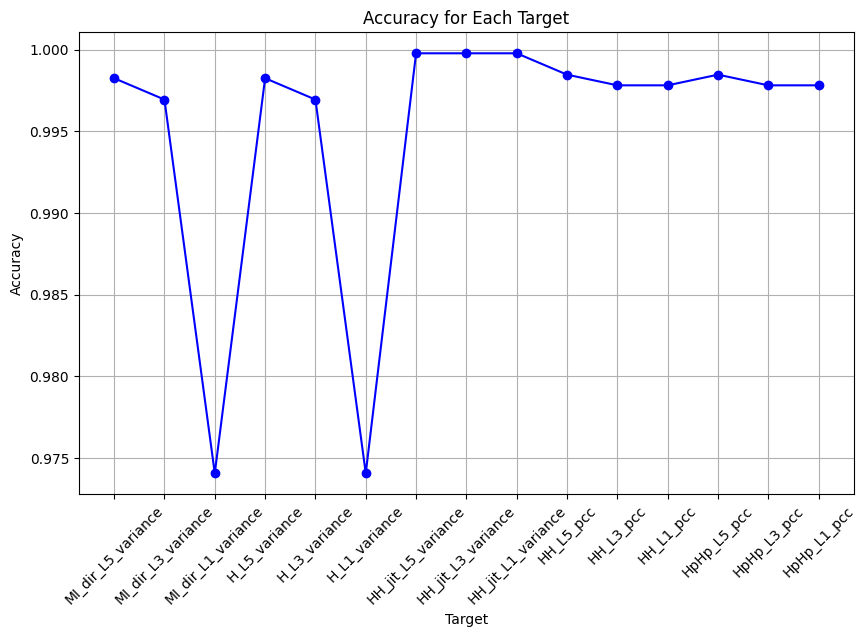

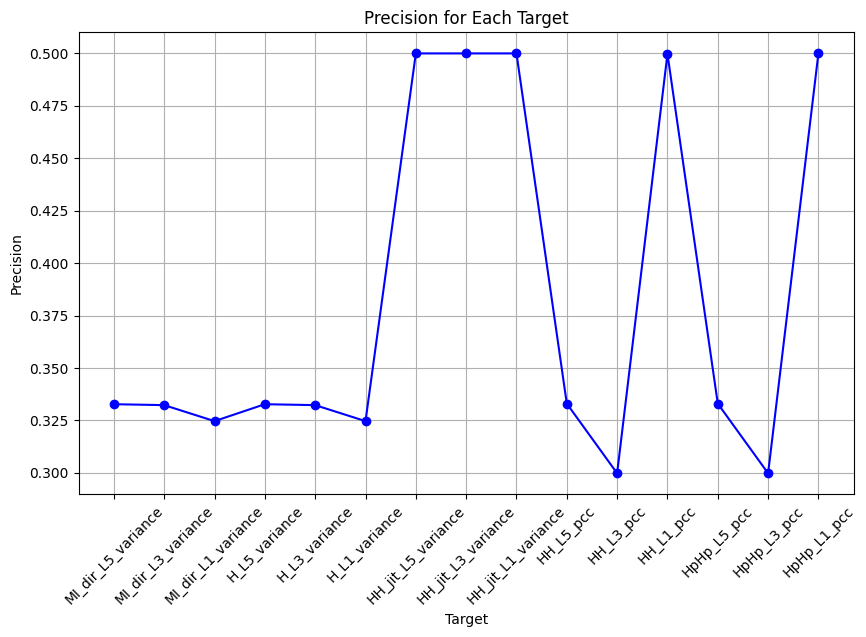

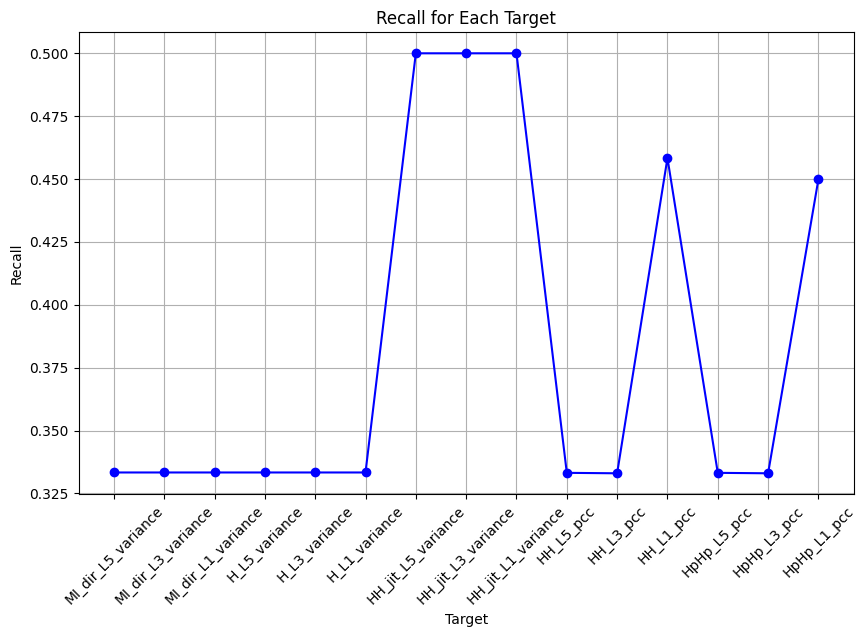

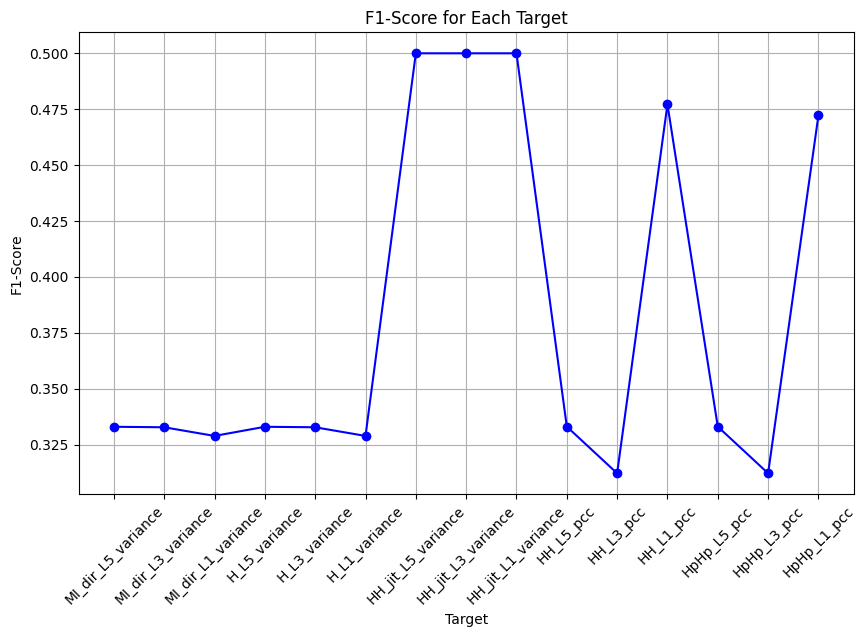

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Perform cross-validation
    cv_scores = cross_val_score(knn_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model
    knn_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = knn_model.predict(X_valid)
    y_valid_pred_binned = np.digitize(y_valid_pred, bins=np.linspace(y_valid_binned[target].min(), y_valid_binned[target].max(), 4)) - 1

    # Predict on the test set
    y_test_pred = knn_model.predict(X_test)
    y_test_pred_binned = np.digitize(y_test_pred, bins=np.linspace(y_test_binned[target].min(), y_test_binned[target].max(), 4)) - 1

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.38674535 0.39945529 0.39400817 0.38555858 0.38419619]
Mean Cross-Validation Accuracy: 0.38999271491315407
Validation Set Performance:
Accuracy: 0.4008714596949891
Precision: 0.3350636289321914
Recall: 0.5167880995749848
F1-Score: 0.19459296117195746
Test Set Performance:
Accuracy: 0.383089997820876
Precision: 0.3331438317225696
Recall: 0.1279196681947173
F1-Score: 0.18485804416403787

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.38629142 0.40036314 0.39400817 0.38601272 0.38510445]
Mean Cross-Validation Accuracy: 0.39035597976996933
Validation Set Performance:
Accuracy: 0.40159767610748004
Precision: 0.3344410245135759
Recall: 0.42526744468757594
F1-Score: 0.19350715057862167
Test Set Performance:
Accuracy: 0.38417955981695356
Precision: 0.3337327598733352
Recall: 0.4058652094717668
F1-Score: 0.18620851876775202

--

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Cross-Validation Accuracy Scores: [0.01270994 0.03994553 0.01997276 0.01680291 0.01453224]
Mean Cross-Validation Accuracy: 0.020792676817963117
Validation Set Performance:
Accuracy: 0.026506899055918662
Precision: 0.32955455455455457
Recall: 0.31729447456907084
F1-Score: 0.01792646677439304
Test Set Performance:
Accuracy: 0.020919590324689475
Precision: 0.33466210517918293
Recall: 0.3343817273429419
F1-Score: 0.018560032166685437

--------------------------------------------------

Training model for target: H_L5_variance
Cross-Validation Accuracy Scores: [0.38674535 0.39945529 0.39400817 0.38555858 0.38419619]
Mean Cross-Validation Accuracy: 0.38999271491315407
Validation Set Performance:
Accuracy: 0.4008714596949891
Precision: 0.3350636289321914
Recall: 0.5167880995749848
F1-Score: 0.19459296117195746
Test Set Performance:
Accuracy: 0.383089997820876
Precision: 0.3331438317225696
Recall: 0.1279196681947173
F1-Score: 0.18485804416403787

-----------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Accuracy: 0.38417955981695356
Precision: 0.3337327598733352
Recall: 0.4058652094717668
F1-Score: 0.18620851876775202

--------------------------------------------------

Training model for target: H_L1_variance
Cross-Validation Accuracy Scores: [0.01270994 0.03994553 0.01997276 0.01680291 0.01453224]
Mean Cross-Validation Accuracy: 0.020792676817963117
Validation Set Performance:
Accuracy: 0.026506899055918662
Precision: 0.32955455455455457
Recall: 0.31729447456907084
F1-Score: 0.01792646677439304
Test Set Performance:
Accuracy: 0.020919590324689475
Precision: 0.33466210517918293
Recall: 0.3343817273429419
F1-Score: 0.018560032166685437

--------------------------------------------------

Training model for target: HH_jit_L5_variance
Cross-Validation Accuracy Scores: [0.64775306 0.63595098 0.64548343 0.6462307  0.64532243]
Mean Cross-Validation Accuracy: 0.6441481210289164
Validation Set Performance:
Accuracy: 0.6361655773420479
Precision: 0.5004985044865404
Recall: 0.8180167090446786


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/l

Cross-Validation Accuracy Scores: [0.64775306 0.63595098 0.64548343 0.6462307  0.64532243]
Mean Cross-Validation Accuracy: 0.6441481210289164
Validation Set Performance:
Accuracy: 0.6361655773420479
Precision: 0.5004985044865404
Recall: 0.8180167090446786
F1-Score: 0.38976155767692994
Test Set Performance:
Accuracy: 0.6471998256700806
Precision: 0.5003086419753087
Recall: 0.823561464690497
F1-Score: 0.39349767593964263

--------------------------------------------------

Training model for target: HH_jit_L1_variance
Cross-Validation Accuracy Scores: [0.64775306 0.63595098 0.64548343 0.6462307  0.64532243]
Mean Cross-Validation Accuracy: 0.6441481210289164
Validation Set Performance:
Accuracy: 0.6361655773420479
Precision: 0.5004985044865404
Recall: 0.8180167090446786
F1-Score: 0.38976155767692994
Test Set Performance:
Accuracy: 0.6471998256700806
Precision: 0.5003086419753087
Recall: 0.823561464690497
F1-Score: 0.39349767593964263

--------------------------------------------------

Tr

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Accuracy: 0.9925909784266724
Precision: 0.5653594771241829
Recall: 0.7198952879581152
F1-Score: 0.5729065317506649

--------------------------------------------------

Training model for target: HH_L3_pcc
Cross-Validation Accuracy Scores: [0.99409896 0.9913754  0.99636859 0.99409628 0.99455041]
Mean Cross-Validation Accuracy: 0.9940979252550914
Validation Set Performance:
Accuracy: 0.9967320261437909
Precision: 0.7272727272727272
Recall: 0.9039118744036777
F1-Score: 0.713249655890546
Test Set Performance:
Accuracy: 0.9930268032251035
Precision: 0.6952380952380951
Recall: 0.997673065735893
F1-Score: 0.7181307032906258

--------------------------------------------------

Training model for target: HH_L1_pcc
Cross-Validation Accuracy Scores: [0.99273718 0.99001362 0.99364503 0.99364214 0.99364214]
Mean Cross-Validation Accuracy: 0.9927360221776679
Validation Set Performance:
Accuracy: 0.006535947712418301
Precision: 0.46166060640226997
Recall: 0.41812386156648457
F1-Score: 0.1883308221235

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Cross-Validation Accuracy Scores: [0.99273718 0.98955969 0.99591466 0.99318801 0.99455041]
Mean Cross-Validation Accuracy: 0.9931899898701424
Validation Set Performance:
Accuracy: 0.9967320261437909
Precision: 0.6545454545454547
Recall: 0.9989078995267565
F1-Score: 0.7605641648941558
Test Set Performance:
Accuracy: 0.9925909784266724
Precision: 0.5653594771241829
Recall: 0.7198952879581152
F1-Score: 0.5729065317506649

--------------------------------------------------

Training model for target: HpHp_L3_pcc
Cross-Validation Accuracy Scores: [0.99409896 0.9913754  0.99636859 0.99409628 0.99455041]
Mean Cross-Validation Accuracy: 0.9940979252550914
Validation Set Performance:
Accuracy: 0.9967320261437909
Precision: 0.7272727272727272
Recall: 0.9039118744036777
F1-Score: 0.713249655890546
Test Set Performance:
Accuracy: 0.9930268032251035
Precision: 0.6952380952380951
Recall: 0.997673065735893
F1-Score: 0.7181307032906258

--------------------------------------------------

Training mode

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Accuracy: 0.002904865649963689
Precision: 0.40277777777777773
Recall: 0.3336974993930566
F1-Score: 0.11567006602191811
Test Set Performance:
Accuracy: 0.9930268032251035
Precision: 0.6794871794871796
Recall: 0.9976689976689976
F1-Score: 0.7486692230253261

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.6317571003123409
Average Precision: 0.48665669751653456
Average Recall: 0.6400594336389146
Average F1-Score: 0.3992802062153726


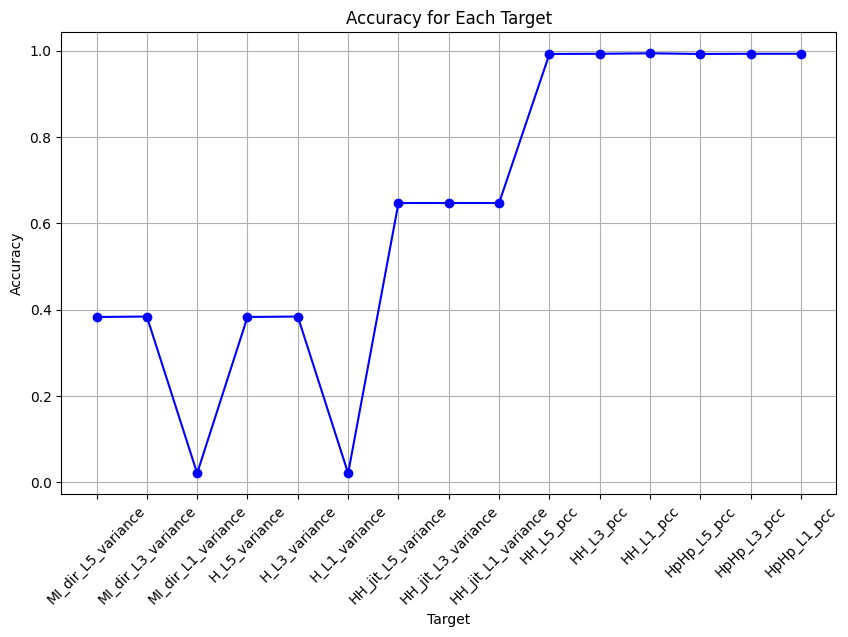

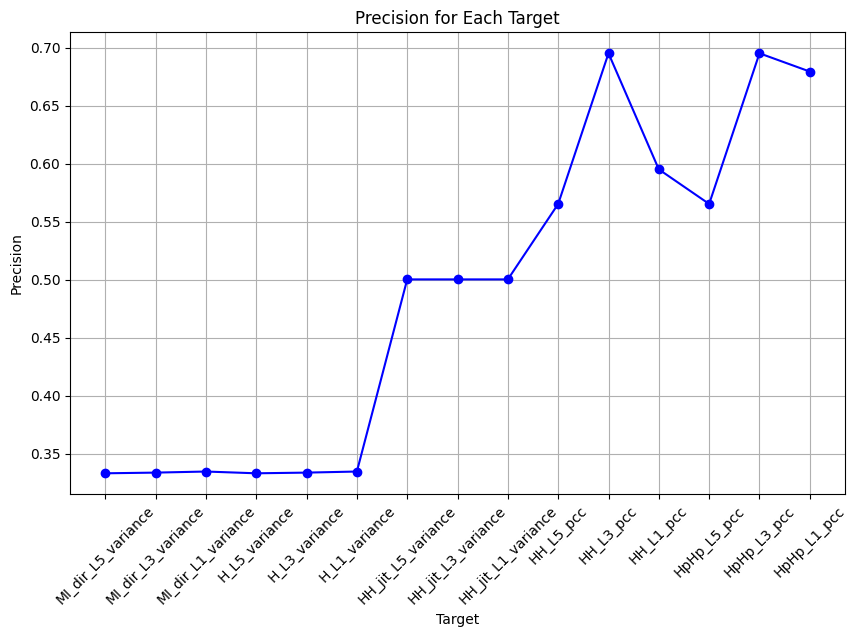

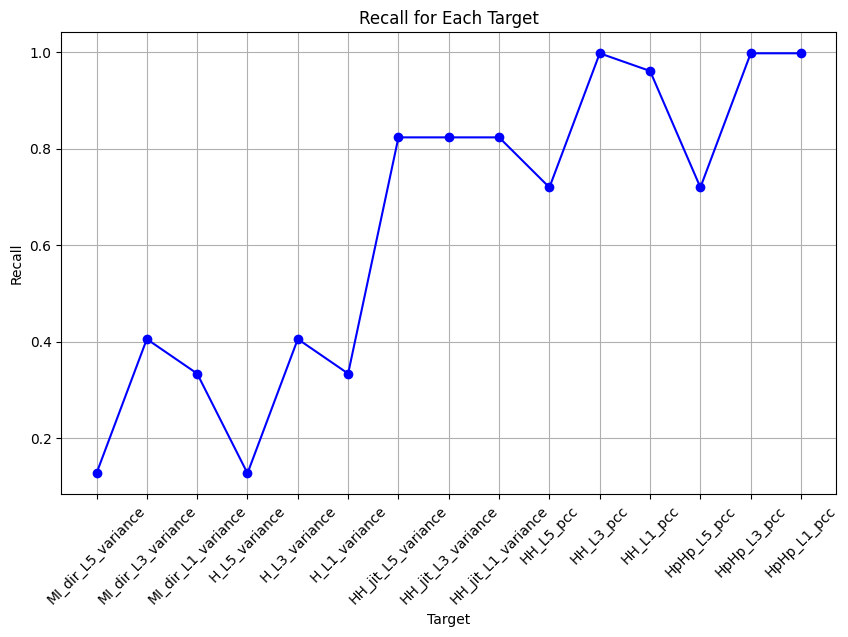

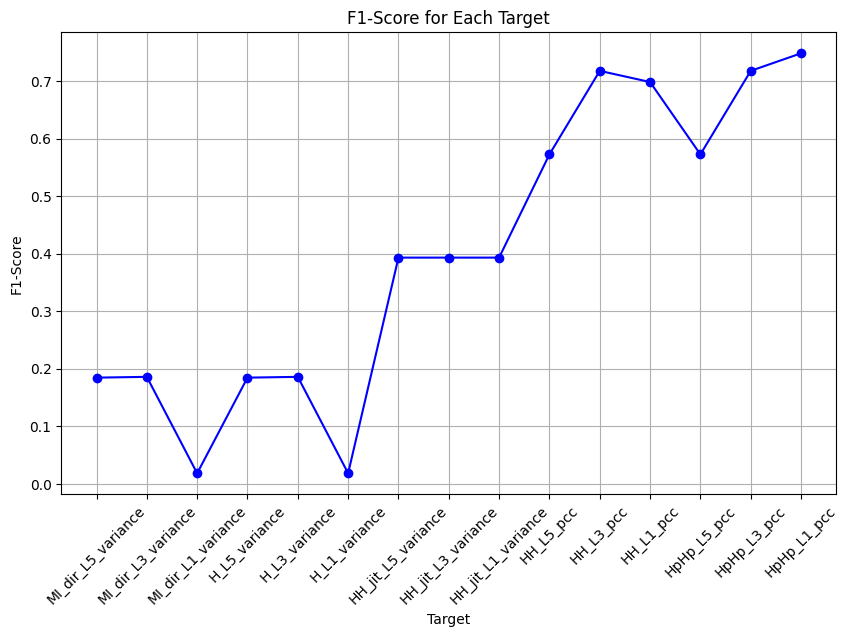

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the Naive Bayes model (Gaussian Naive Bayes for continuous features)
nb_model = GaussianNB()

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Perform cross-validation
    cv_scores = cross_val_score(nb_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model
    nb_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = nb_model.predict(X_valid)
    y_valid_pred_binned = bin_targets(pd.DataFrame(y_valid_pred, columns=[target]))

    # Predict on the test set
    y_test_pred = nb_model.predict(X_test)
    y_test_pred_binned = bin_targets(pd.DataFrame(y_test_pred, columns=[target]))

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned[target])
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned[target])
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.99909215 0.99863822 0.99863822 0.99909173 0.99909173]
Mean Cross-Validation Accuracy: 0.9989104115723626
Validation Set Performance:
Accuracy: 0.9967320261437909
Precision: 0.332244008714597
Recall: 0.3333333333333333
F1-Score: 0.33278777959629025
Test Set Performance:
Accuracy: 0.9982567008062759
Precision: 0.332752233602092
Recall: 0.3333333333333333
F1-Score: 0.3330425299890949

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.99863822 0.99818429 0.99818429 0.9986376  0.9986376 ]
Mean Cross-Validation Accuracy: 0.9984564026513263
Validation Set Performance:
Accuracy: 0.9956427015250545
Precision: 0.3318809005083515
Recall: 0.3333333333333333
F1-Score: 0.3326055312954876
Test Set Performance:
Accuracy: 0.9969492264109828
Precision: 0.3323164088036609
Recall: 0.3333333333333333
F1-Score: 0.33282409428197296

----------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning

Cross-Validation Accuracy Scores: [0.97730368 0.97821153 0.97866546 0.9777475  0.9777475 ]
Mean Cross-Validation Accuracy: 0.9779351334547928
Validation Set Performance:
Accuracy: 0.9731299927378358
Precision: 0.43619301864660437
Recall: 0.3411697105230463
F1-Score: 0.3444173197995632
Test Set Performance:
Accuracy: 0.9734146872957071
Precision: 0.4358638743455497
Recall: 0.33760125851695216
F1-Score: 0.33761369405399955

--------------------------------------------------

Training model for target: HH_jit_L5_variance
Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0
Validation Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Test Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

--------------------------------------------------

Training model for target: HH_jit_L3_variance
Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0
Validation Set Performance:
Accuracy: 1.0
P

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0
Validation Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Test Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

--------------------------------------------------

Training model for target: HH_L5_pcc
Cross-Validation Accuracy Scores: [1.         0.99954607 0.99954607 0.99954587 0.99909173]
Mean Cross-Validation Accuracy: 0.999545949850402
Validation Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Test Set Performance:
Accuracy: 0.9993462628023535
Precision: 0.6665212967001017
Recall: 0.5555555555555555
F1-Score: 0.5999272991639404

--------------------------------------------------

Training model for target: HH_L3_pcc
Cross-Validation Accuracy Scores: [1.         1.         0.99954607 0.99909173 0.99954587]
Mean Cross-Validation Accuracy: 0.9996367351431846
Validation Set Performance:
Accuracy: 0.9992737835875091
Precision: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


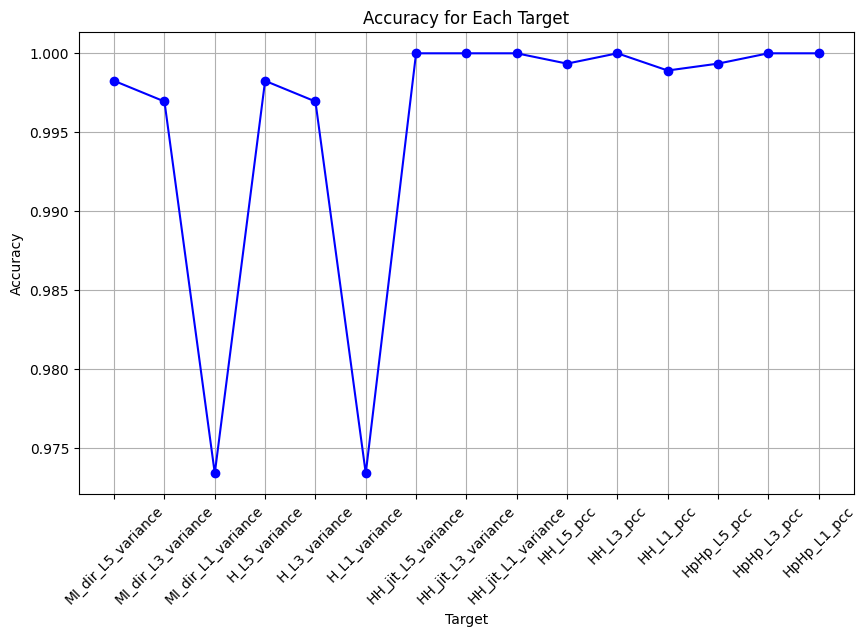

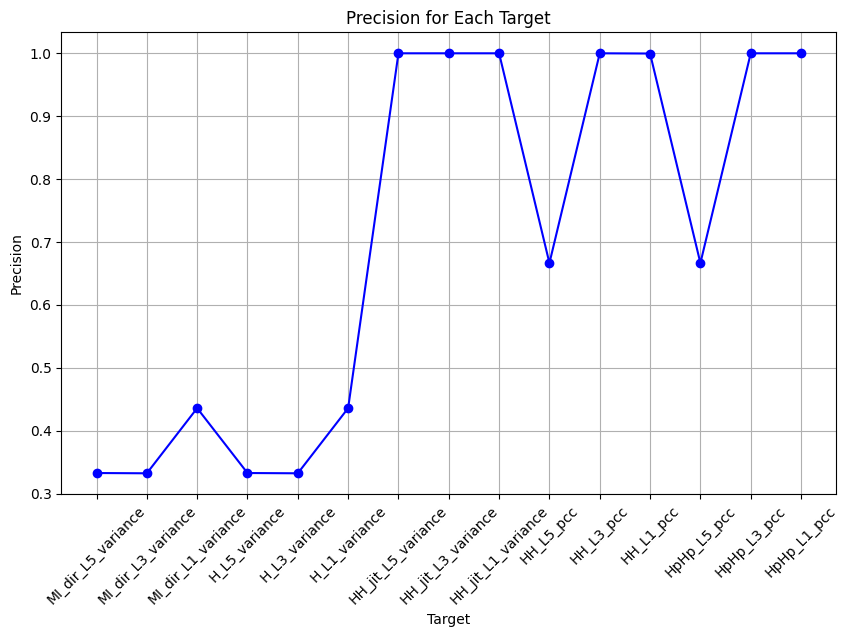

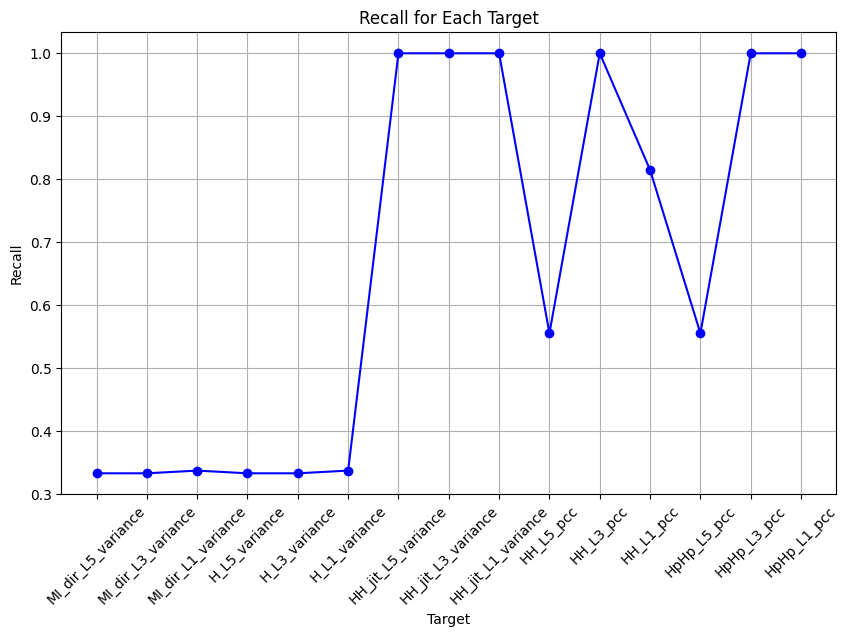

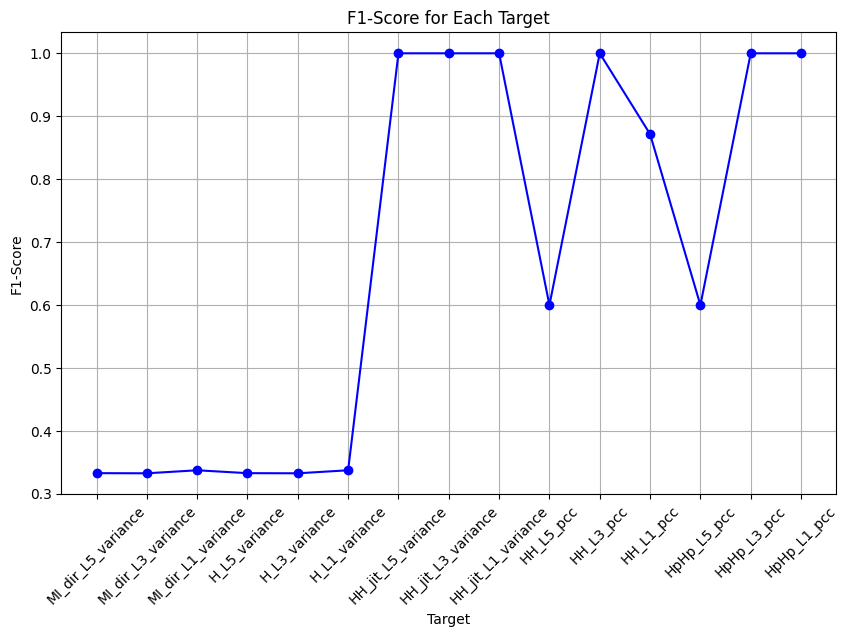

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Ensure target_columns is defined and not empty
if 'target_columns' in locals() and target_columns:
    # Train and evaluate the model for each target column
    for target in target_columns:
        print(f"Training model for target: {target}")

        # Initialize the Random Forest model
        rf_model = DecisionTreeClassifier(random_state=42)

        # Perform cross-validation
        cv_scores = cross_val_score(rf_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
        print(f"Cross-Validation Accuracy Scores: {cv_scores}")
        print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

        # Train the model on the full training set
        rf_model.fit(X_train, y_train_binned[target])

        # Predict on the validation set
        y_valid_pred = rf_model.predict(X_valid)

        # Predict on the test set
        y_test_pred = rf_model.predict(X_test)

        # Generate classification performance metrics
        def generate_classification_metrics(y_true, y_pred):
            accuracy = accuracy_score(y_true, y_pred)
            precision = precision_score(y_true, y_pred, average='macro')
            recall = recall_score(y_true, y_pred, average='macro')
            f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
            return accuracy, precision, recall, f1

        print("Validation Set Performance:")
        val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
        print(f"Accuracy: {val_accuracy}")
        print(f"Precision: {val_precision}")
        print(f"Recall: {val_recall}")
        print(f"F1-Score: {val_f1}")

        print("Test Set Performance:")
        test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
        print(f"Accuracy: {test_accuracy}")
        print(f"Precision: {test_precision}")
        print(f"Recall: {test_recall}")
        print(f"F1-Score: {test_f1}")

        print("\n" + "-"*50 + "\n")

        # Append metrics to overall lists
        overall_accuracy.append(test_accuracy)
        overall_precision.append(test_precision)
        overall_recall.append(test_recall)
        overall_f1.append(test_f1)

    # Calculate the overall performance metrics
    avg_accuracy = np.mean(overall_accuracy)
    avg_precision = np.mean(overall_precision)
    avg_recall = np.mean(overall_recall)
    avg_f1 = np.mean(overall_f1)

    print("Overall Performance on Test Set:")
    print(f"Average Accuracy: {avg_accuracy}")
    print(f"Average Precision: {avg_precision}")
    print(f"Average Recall: {avg_recall}")
    print(f"Average F1-Score: {avg_f1}")

    # Define the plot_metrics function
    def plot_metrics(metrics, metric_name):
        plt.figure(figsize=(10, 6))
        plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
        plt.title(f'{metric_name} for Each Target')
        plt.xlabel('Target')
        plt.ylabel(metric_name)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

    # Plotting
    plot_metrics(overall_accuracy, 'Accuracy')
    plot_metrics(overall_precision, 'Precision')
    plot_metrics(overall_recall, 'Recall')
    plot_metrics(overall_f1, 'F1-Score')
else:
    print("Error: target_columns is not defined or is empty.")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.99909215 0.99863822 0.99863822 0.99909173 0.99909173]
Mean Cross-Validation Accuracy: 0.9989104115723626
Validation Set Performance:
Accuracy: 0.9967320261437909
Precision: 0.332244008714597
Recall: 0.3333333333333333
F1-Score: 0.33278777959629025
Test Set Performance:
Accuracy: 0.9982567008062759
Precision: 0.332752233602092
Recall: 0.3333333333333333
F1-Score: 0.3330425299890949

--------------------------------------------------

Training model for target: MI_dir_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99863822 0.99818429 0.99818429 0.9986376  0.9986376 ]
Mean Cross-Validation Accuracy: 0.9984564026513263
Validation Set Performance:
Accuracy: 0.9956427015250545
Precision: 0.3318809005083515
Recall: 0.3333333333333333
F1-Score: 0.3326055312954876
Test Set Performance:
Accuracy: 0.9969492264109828
Precision: 0.3323164088036609
Recall: 0.3333333333333333
F1-Score: 0.33282409428197296

--------------------------------------------------

Training model for target: MI_dir_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.97821153 0.97866546 0.97866546 0.97820163 0.97820163]
Mean Cross-Validation Accuracy: 0.978389142375829
Validation Set Performance:
Accuracy: 0.9738562091503268
Precision: 0.6581849024597116
Recall: 0.34141818859485645
F1-Score: 0.345176859939376
Test Set Performance:
Accuracy: 0.9738505120941382
Precision: 0.4914231719726705
Recall: 0.33775040094797376
F1-Score: 0.3378052610914802

--------------------------------------------------

Training model for target: H_L5_variance
Cross-Validation Accuracy Scores: [0.99909215 0.99863822 0.99863822 0.99909173 0.99909173]
Mean Cross-Validation Accuracy: 0.9989104115723626
Validation Set Performance:
Accuracy: 0.9967320261437909
Precision: 0.332244008714597
Recall: 0.3333333333333333
F1-Score: 0.33278777959629025
Test Set Performance:
Accuracy: 0.9982567008062759
Precision: 0.332752233602092
Recall: 0.3333333333333333
F1-Score: 0.3330425299890949

--------------------------------------------------

Training m

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99863822 0.99818429 0.99818429 0.9986376  0.9986376 ]
Mean Cross-Validation Accuracy: 0.9984564026513263
Validation Set Performance:
Accuracy: 0.9956427015250545
Precision: 0.3318809005083515
Recall: 0.3333333333333333
F1-Score: 0.3326055312954876
Test Set Performance:
Accuracy: 0.9969492264109828
Precision: 0.3323164088036609
Recall: 0.3333333333333333
F1-Score: 0.33282409428197296

--------------------------------------------------

Training model for target: H_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.97821153 0.97866546 0.97866546 0.97820163 0.97820163]
Mean Cross-Validation Accuracy: 0.978389142375829
Validation Set Performance:
Accuracy: 0.9738562091503268
Precision: 0.6581849024597116
Recall: 0.34141818859485645
F1-Score: 0.345176859939376
Test Set Performance:
Accuracy: 0.9738505120941382
Precision: 0.4914231719726705
Recall: 0.33775040094797376
F1-Score: 0.3378052610914802

--------------------------------------------------

Training model for target: HH_jit_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0
Validation Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Test Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0
Validation Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Test Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0
Validation Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Test Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

--------------------------------------------------

Training model for target: HH_L5_pcc
Cross-Validation Accuracy Scores: [1.         0.99954607 0.99954607 0.99954587 0.99954587]
Mean Cross-Validation Accuracy: 0.9996367763717464
Validation Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Test Set Performance:
Accuracy: 0.9993462628023535
Precision: 0.6665212967001017
Recall: 0.5555555555555555
F1-Score: 0.5999272991639404

--------------------------------------------------

Training model for target: HH_L3_pcc
Cross-Validation Accuracy Scores: [1.         1.         0.99954607 0.99954587 1.        ]
Mean Cross-Validation Accuracy: 0.9998183881858733
Validation Set Performance:
Accuracy: 0.9992737835875091
Precision: 0

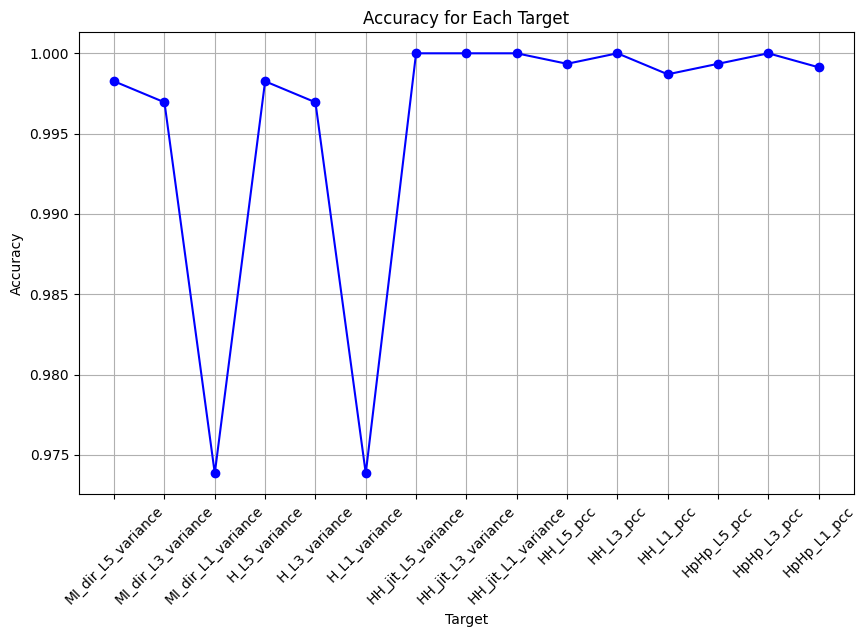

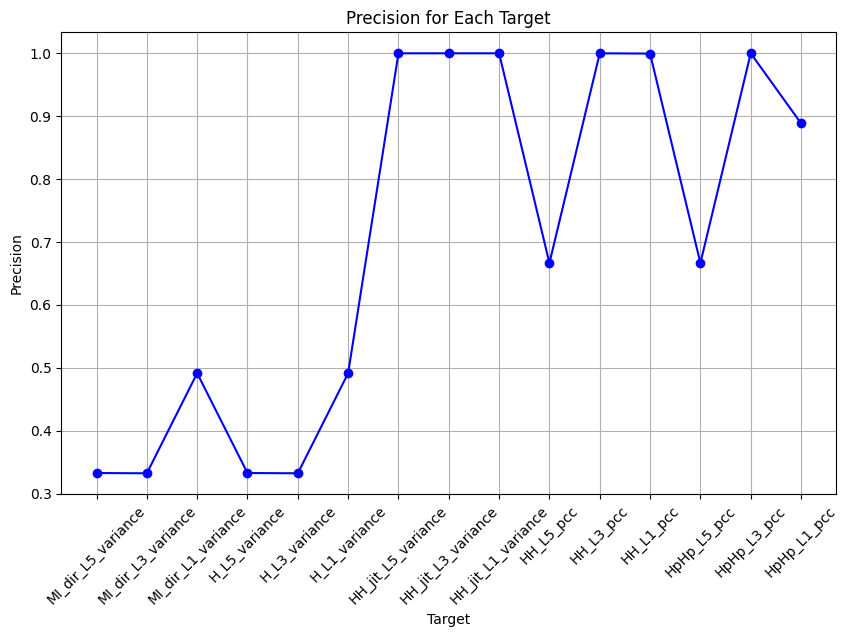

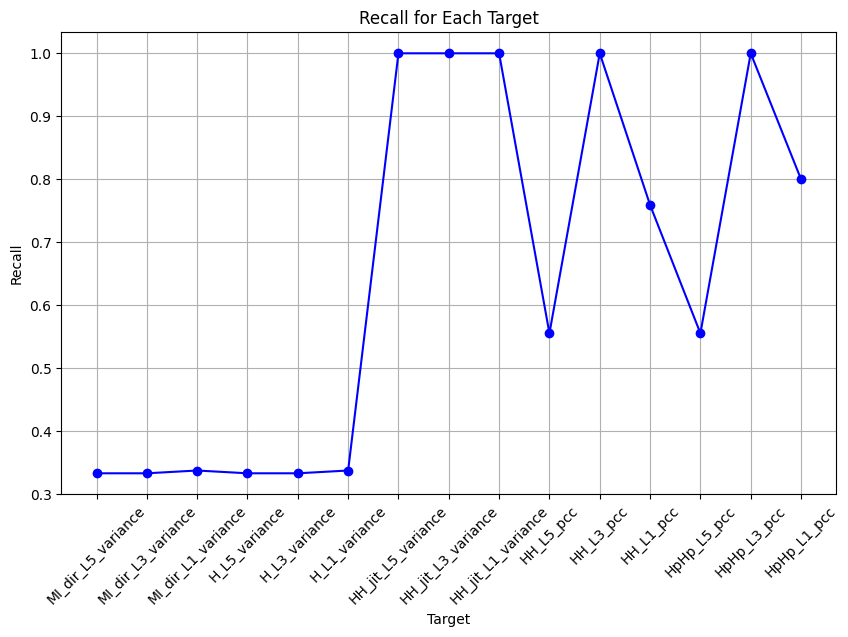

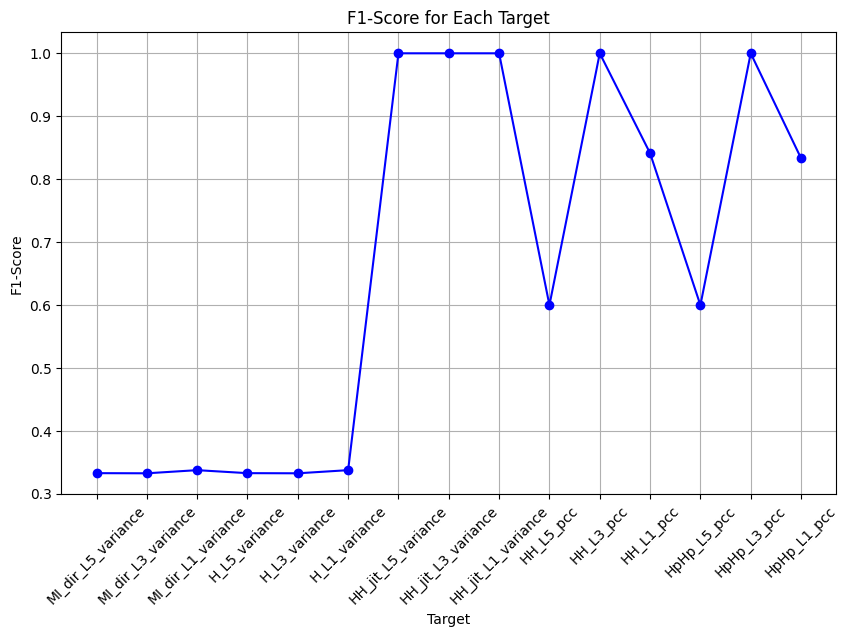

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)

    # Perform cross-validation
    cv_scores = cross_val_score(rf_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model on the full training set
    rf_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = rf_model.predict(X_valid)

    # Predict on the test set
    y_test_pred = rf_model.predict(X_test)

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

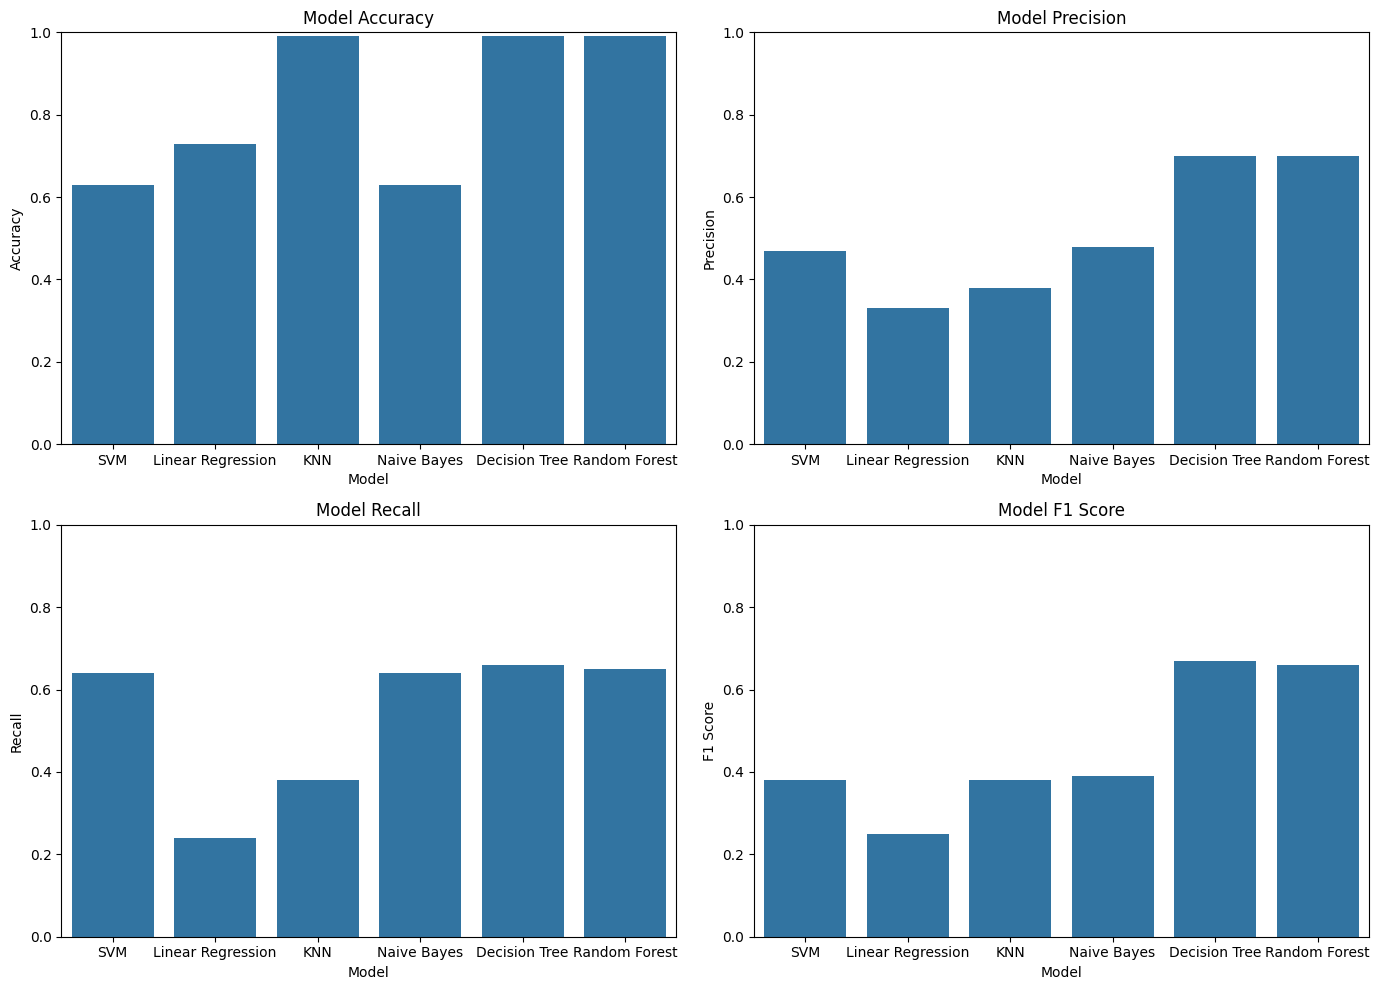

In [ ]:
data = {
    'Model': ['SVM', 'Linear Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.63, 0.73, 0.99, 0.63, 0.99, 0.99],
    'Precision': [0.47, 0.33, 0.38,0.48, 0.70, 0.70],
    'Recall': [0.64, 0.24, 0.38, 0.64, 0.66, 0.65],
    'F1 Score': [0.38, 0.25, 0.38, 0.39, 0.67, 0.66]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(14, 10))

# Plot Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df)
plt.title('Model Accuracy')
plt.ylim(0, 1)

# Plot Precision
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=df)
plt.title('Model Precision')
plt.ylim(0, 1)

# Plot Recall
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=df)
plt.title('Model Recall')
plt.ylim(0, 1)

# Plot F1 Score
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=df)
plt.title('Model F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()